<a href="https://colab.research.google.com/github/call493/MLFC/blob/main/_notebooks/04-01-clustering-and-high-dimensions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and High Dimensions

### Neil D. Lawrence

### 2025-09-22

**Abstract**: In this lecture we turn to *unsupervised learning*. We
look at clustering models and consider how data behaves in high
dimensions.

$$
$$

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

## ML Foundations Course Notebook Setup

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_mlfc/includes/mlfc-notebook-setup.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_mlfc/includes/mlfc-notebook-setup.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We install some bespoke codes for creating and saving plots as well as
loading data sets.

In [1]:
%%capture
%pip install notutils
%pip install git+https://github.com/lawrennd/ods.git
%pip install git+https://github.com/lawrennd/mlai.git

In [2]:
import notutils
import pods
import mlai
import mlai.plot as plot

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

<!--setupplotcode{import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('paper')
sns.set_palette('colorblind')}-->

## Review

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/clustering-and-high-dimensions.gpp.markdown" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/clustering-and-high-dimensions.gpp.markdown', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

So far in our classes we have focussed on regression problems and
generalised linear models. These are examples of supervised learning. We
have considered the relationship between the likelihood and the
objective function and we have shown how we can find paramters by
maximizing the likelihood (equivalent to minimizing the objective
function) in this session we look at latent variables.

## Clustering

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/clustering-intro.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/clustering-intro.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Clustering is a common approach to data analysis, though we will not
cover it in great depth in this course. The fundamental idea is to
associate each data point $\mathbf{ y}_{i, :}$ with one of $k$ different
discrete groups. This approach raises interesting questions - for
instance, when clustering animals into groups, we might ask whether
animal traits are truly discrete or continuous in nature. Similar
questions arise when clustering political affiliations.

Humans seem to have a natural affinity for discrete clustering
approaches. This makes clustering particularly useful when collaborating
with biologists, who often think in terms of discrete categories.
However, we should be mindful that this preference for discrete
categories may sometimes oversimplify continuous variations in data.

There is a subtle but important distinction between clustering and
vector quantisation. In true clustering, we typically expect to see
reductions in data density between natural groups - essentially, gaps in
the data that separate different clusters. This definition isn’t
universally applied though, and vector quantization may partition data
without requiring such density gaps. For our current discussion, we’ll
treat them similarly, focusing on the common challenges they share: how
to allocate points to groups and, more challengingly, how to determine
the optimal number of groups.

Clustering methods associate data points with different labels that are
allocated by the computer rather than provided by human annotators. This
process is quite intuitive for humans - we naturally cluster our
observations of the real world. For example, we cluster animals into
groups like birds, mammals, and insects. While these labels can be
provided by humans, they were originally invented through a clustering
process. With computational clustering, we want to recreate that process
of label invention.

When thinking about ideas, the Greek philosopher Plato considered the
concept of Platonic ideals - the most quintessential version of a thing,
like the most bird-like bird or chair-like chair. In clustering, we aim
to define different categories by finding their Platonic ideals (cluster
centers) and allocating each data point to its nearest center. This
allows computers to form categorizations of data at scales too large for
human processing.

## $k$-means Clustering

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/k-means-clustering.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/k-means-clustering.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

To implement clustering computationally, we need to mathematically
represent both our objects and cluster centres as vectors
($\mathbf{ x}_i$ and $\boldsymbol{ \mu}_j$ respectively) and define a
notion of either similarity or distance between them. The distance
function $d_{ij} = f(\mathbf{ x}_i, \boldsymbol{ \mu}_j)$ measures how
far each object is from potential cluster centres. For example, we might
cluster customers by representing them through their purchase history
and measuring their distance to different customer archetypes.

## Squared Distance

A commonly used distance metric is the squared distance:
$d_{ij} = (\mathbf{ x}_i - \boldsymbol{ \mu}_j)^2$. This metric appears
frequently in machine learning - we saw it earlier measuring prediction
errors in regression, and here it measures dissimilarity between data
points and cluster centres.

Once we have decided on the distance or similarity function, we can
decide a number of cluster centres, $K$. We find their location by
allocating each center to a sub-set of the points and minimizing the sum
of the squared errors, $$
E(\mathbf{M}) = \sum_{i \in \mathbf{i}_j} (\mathbf{ x}_i - \boldsymbol{ \mu}_j)^2
$$ where the notation $\mathbf{i}_j$ represents all the indices of each
data point which has been allocated to the $j$th cluster represented by
the center $\boldsymbol{ \mu}_j$.

## $k$-Means Clustering

One approach to minimizing this objective function is known as
*$k$-means clustering*. It is simple and relatively quick to implement,
but it is an initialization sensitive algorithm. Initialization is the
process of choosing an initial set of parameters before optimization.
For $k$-means clustering you need to choose an initial set of centres.
In $k$-means clustering your final set of clusters is very sensitive to
the initial choice of centres. For more technical details on $k$-means
clustering you can watch a video of Alex Ihler introducing the algorithm
here.

The $k$-means algorithm provides a straightforward approach to
clustering data. It requires two key elements: a set of $k$ cluster
centres and a way to assign each data point to a cluster. The algorithm
follows a simple iterative process:

1.  First, initialize cluster centres by randomly selecting $k$ data
    points
2.  Assign each data point to its nearest cluster centre
3.  Update each cluster centre by computing the mean of all points
    assigned to it
4.  Repeat steps 2 and 3 until the cluster assignments stop changing

This process is intuitive and relatively easy to implement, though it
comes with certain limitations.

The $k$-means algorithm works by minimizing an objective function that
measures the sum of squared Euclidean distances between each point and
its assigned cluster center. This objective function can be written
mathematically as shown above, where $\boldsymbol{ \mu}_{j, :}$
represents the mean of cluster $j$.

It’s important to understand that while this algorithm will always
converge to a minimum, this minimum is not guaranteed to be either
global or unique. The optimization problem is non-convex, meaning there
can be multiple local minima. Different initializations of the cluster
centres can lead to different final solutions, which is one of the key
challenges in applying $k$-means clustering in practice.

In [ ]:
from mlai import generate_cluster_data
import inspect
file_path = inspect.getfile(generate_cluster_data)

In [ ]:
# %load -s generate_cluster_data /Users/neil/lawrennd/mlai/mlai/mlai.py
def generate_cluster_data(n_points_per_cluster=30):
    """Generate synthetic data with clear cluster structure for educational purposes"""
    # Define cluster centres in 2D space
    cluster_centres = np.array([[2.5, 2.5], [-2.5, -2.5], [2.5, -2.5]])

    # Generate data points around each center
    data_points = []
    for center in cluster_centres:
        # Generate points with some spread around each center
        cluster_points = np.random.normal(loc=center, scale=0.8, size=(n_points_per_cluster, 2))
        data_points.append(cluster_points)

    return np.vstack(data_points)


In [ ]:
from mlai import dist2
import inspect
file_path = inspect.getfile(dist2)

In [ ]:
# %load -s dist2 /Users/neil/lawrennd/mlai/mlai/mlai.py
def dist2(X1, X2):
    """
    Return the squared distance matrix between two 2-D arrays.

    Key insight: ||x - y||² = ||x||² + ||y||² - 2⟨x,y⟩

    Why? Expand (x-y)·(x-y) = x·x - 2x·y + y·y
    """

    return (np.sum(X1*X1, axis=1, keepdims=True)
            + np.sum(X2*X2, axis=1)
            - 2*X1@X2.T)


In [ ]:
from mlai import kmeans_assignments
import inspect
file_path = inspect.getfile(kmeans_assignments)

In [ ]:
# %load -s kmeans_assignments /Users/neil/lawrennd/mlai/mlai/mlai.py
def kmeans_assignments(Y, centres):
    """Assign each point to nearest centre"""
    sq_distances = ((Y[:, np.newaxis] - centres[np.newaxis, :])**2).sum(axis=2)
    return np.argmin(sq_distances, axis=1)


In [ ]:
from mlai import kmeans_update
import inspect
file_path = inspect.getfile(kmeans_update)

In [ ]:
# %load -s kmeans_update /Users/neil/lawrennd/mlai/mlai/mlai.py
def kmeans_update(Y, centres):
    """Perform an update of centre locations for k-means algorithm"""
    assignments = kmeans_assignments(Y, centres)

    # Update centres to be mean of assigned points
    new_centres = np.array([Y[assignments == k].mean(axis=0)
                           for k in range(len(centres))])

    return new_centres, assignments


In [ ]:
from mlai import kmeans_objective
import inspect
file_path = inspect.getfile(kmeans_objective)

In [ ]:
# %load -s kmeans_objective /Users/neil/lawrennd/mlai/mlai/mlai.py
def kmeans_objective(Y, centres, assignments=None):
    """Calculate the k-means objective function (sum of squared distances)"""

    if assignments is None:
        assignments = kmeans_assignments(Y, centres)

    total_error = 0
    for k in range(len(centres)):
        cluster_points = Y[assignments == k]
        if len(cluster_points) > 0:
            sq_distances = dist2(cluster_points, centres[k:k+1, :])
            total_error += np.sum(sq_distances)
    return total_error


In [ ]:
import numpy as np

In [ ]:
# Generate synthetic data with cluster structure
np.random.seed(24)
Y = generate_cluster_data(n_points_per_cluster=30)

# Initialize cluster centres from first cluster
# Note: this is a *bad* initialisation so we can observe algorithm.
nclusters = 3
centres = Y[:nclusters, :].copy()

In [ ]:
# Run k-means algorithm for several iterations
niters = 10
centres_store = [centres.copy()]  # Store initial centres
objective_store = [kmeans_objective(Y, centres)]  # Calculate initial objective

print(f"Initial objective: {objective_store[0]:.2f}")
print("Running k-means algorithm...")

for iteration in range(niters):
    centres, assignments = kmeans_update(Y, centres)
    objective = kmeans_objective(Y, centres)

    print(f"  Iteration {iteration+1}: objective = {objective:.2f}")

    # Store results for plotting
    centres_store.append(centres.copy())
    objective_store.append(objective)

print(f"Final objective: {objective_store[-1]:.2f}")
print(f"Objective improvement: {objective_store[0] - objective_store[-1]:.2f}")

Initial objective: 1506.38
Running k-means algorithm...
  Iteration 1: objective = 490.59
  Iteration 2: objective = 472.84
  Iteration 3: objective = 377.50
  Iteration 4: objective = 151.10
  Iteration 5: objective = 108.43
  Iteration 6: objective = 108.43
  Iteration 7: objective = 108.43
  Iteration 8: objective = 108.43
  Iteration 9: objective = 108.43
  Iteration 10: objective = 108.43
Final objective: 108.43
Objective improvement: 1397.95


In [ ]:
from matplotlib import pyplot as plt
import mlai
from mlai import plot

Plot 3
Plot 4
Plot 5
Plot 6
Plot 7
Plot 8
Plot 9
Plot 10
Plot 11
Plot 12
Plot 13
Plot 14
Plot 15
Plot 16
Plot 17
Plot 18
Plot 19
Plot 20
Plot 21
Plot 22


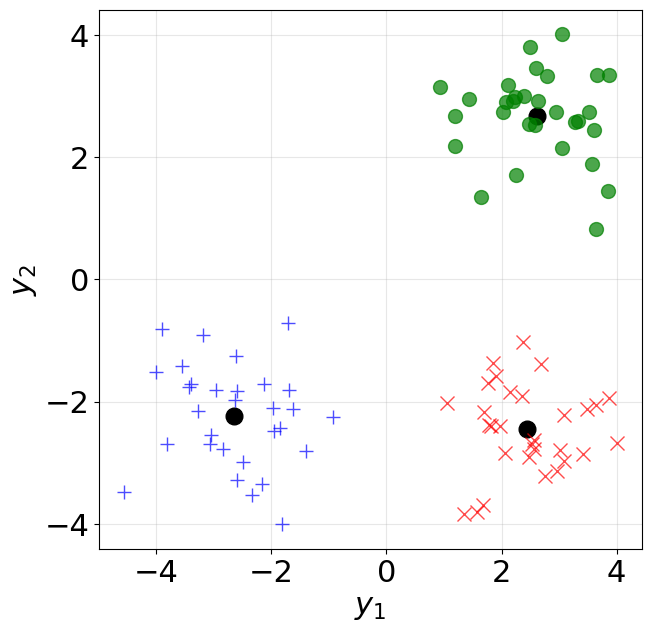

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_figsize)
colors = ['red', 'green', 'blue']  # Colors for each cluster
markers = ['x', 'o', '+']  # Different markers for each cluster

centres = centres_store[0]
objective = objective_store[0]

# Plot initial data
h_data = ax.plot(Y[:, 0], Y[:, 1], '.', color='black', markersize=10, alpha=0.6)[0]
ax.set_xlabel('$y_1$')
ax.set_ylabel('$y_2$')
ax.grid(True, alpha=0.3)

# Save initial plot
counter = 0
mlai.write_figure_caption(counter, 'Data set to be analysed and initialise cluster centres.', filestub="kmeans_clustering", ext="svg", directory="./ml")

# Plot initial centres
h_centres = ax.plot(centres_store[0][:, 0], centres_store[0][:, 1], 'o', color='black',
        linewidth=3, markersize=12)[0]

counter += 1
mlai.write_figure_caption(counter, 'Allocate each point to the cluster with the nearest centre', filestub="kmeans_clustering", ext="svg", directory="./ml")

# Compute initial assignments
assignments = kmeans_assignments(Y, centres)

# Initialize plot handles for each cluster
h_points = [None]*nclusters
h_data.set_data([], [])
for cluster_id in range(nclusters):
    cluster_mask = assignments == cluster_id
    if np.any(cluster_mask):  # Only plot if cluster has points
        h_points[cluster_id] = ax.plot(Y[cluster_mask, 0], Y[cluster_mask, 1],
                markers[cluster_id], color=colors[cluster_id],
                markersize=10, alpha=0.7)[0]  # Get the Line2D object

counter += 1
mlai.write_figure_caption(counter, 'Initial centre allocations', filestub="kmeans_clustering", ext="svg", directory="./ml")
for iteration in range(len(centres_store)-1):
    centres = centres_store[iteration+1]
    assignments = kmeans_assignments(Y, centres)
    objective = objective_store[iteration+1]

    # Update centres plot
    h_centres.set_data(centres[:, 0], centres[:, 1])

    # Save plot for animation
    counter += 1
    print(f"Plot {counter}")
    mlai.write_figure_caption(counter, f'Iteration {iteration + 1}: Update centres to mean of assigned points', filestub="kmeans_clustering", ext="svg", directory="./ml")


    # Update data points for each cluster
    for cluster_id in range(nclusters):
        cluster_mask = assignments == cluster_id
        if np.any(cluster_mask):  # Only update if cluster has points
            if h_points[cluster_id] is None:
                # Create new plot handle if it doesn't exist
                h_points[cluster_id] = ax.plot(Y[cluster_mask, 0], Y[cluster_mask, 1],
                     markers[cluster_id], color=colors[cluster_id],
                     markersize=10, alpha=0.7)[0]
            else:
                # Update existing plot handle
                h_points[cluster_id].set_data(Y[cluster_mask, 0], Y[cluster_mask, 1])
        else:
            # Hide cluster if it has no points
            if h_points[cluster_id] is not None:
                h_points[cluster_id].set_data([], [])

    # Save plot for animation
    counter += 1
    print(f"Plot {counter}")
    mlai.write_figure_caption(counter, f'Iteration {iteration + 1}: Update assignments to centres', filestub="kmeans_clustering", ext="svg", directory="./ml")

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots("kmeans_clustering_{counter:0>3}.svg", directory="./ml",
                            text_top='kmeans_clustering_{counter:0>3}.tex', counter=(0, 22))

interactive(children=(Text(value='kmeans_clustering_{counter:0>3}.tex', description='text_top'), IntSlider(val…

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/kmeans_clustering_013.svg" class="" width="\width" style="vertical-align:middle;">

Figure: <i>Clustering with the $k$-means clustering algorithm.</i>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mlai

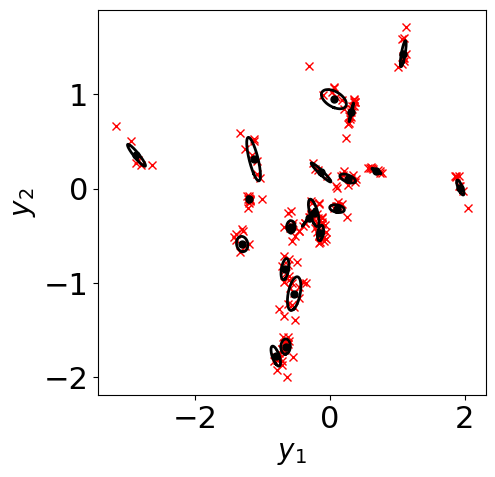

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

num_centres = 20
num_data = 200
centres = np.random.normal(size=(num_centres, 2))
w = np.random.normal(size=(num_centres, 2))*0.1
alloc = np.random.randint(0, num_centres, size=(num_data))
sigma = np.random.normal(size=(num_centres, 1))*0.05
epsilon = np.random.normal(size=(num_data,2))*sigma[alloc, :]

Y = w[alloc, :]*np.random.normal(size=(num_data, 1)) + centres[alloc, :] + epsilon

ax.plot(Y[:, 0], Y[:, 1], 'rx')
ax.set_xlabel('$y_1$', fontsize=20)
ax.set_ylabel('$y_2$', fontsize=20)

mlai.write_figure("cluster_data00.svg", directory="./ml/")
pi_vals = np.linspace(-np.pi, np.pi, 200)[:, None]
for i in range(num_centres):
    ax.plot(centres[i, 0], centres[i, 1], 'o', markersize=5, color=[0, 0, 0], linewidth=2)
    x = np.hstack([np.sin(pi_vals), np.cos(pi_vals)])
    L = np.linalg.cholesky(np.outer(w[i, :],w[i, :]) + sigma[i]**2*np.eye(2))
    el = np.dot(x, L.T)
    ax.plot(centres[i, 0] + el[:, 0], centres[i, 1] + el[:, 1], linewidth=2, color=[0,0,0])
mlai.write_figure("cluster_data01.svg", directory="./ml/")

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('cluster_data{counter:0>2}.svg', directory='./ml', counter=(0, 1))

interactive(children=(IntSlider(value=0, description='counter', max=1), Output()), _dom_classes=('widget-inter…

## Hierarchical Clustering

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/hierarchical-clustering.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/hierarchical-clustering.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Hierarchical clustering builds a tree structure by iteratively merging
the closest clusters. Unlike $k$-means, we don’t need to specify the
number of clusters in advance. Instead, we start with each point as its
own cluster and merge the closest pairs until we have one cluster
containing all points. The result is a dendrogram - a tree that shows
the complete merge history and allows us to extract any number of
clusters by cutting the tree at different heights.

## Linkage Criteria

The choice of linkage criterion determines how we measure distance
between clusters. Single linkage uses the minimum distance between any
two points in different clusters, making it sensitive to outliers.
Complete linkage uses the maximum distance, creating more compact
clusters. Average linkage provides a balance, while Ward linkage
minimizes the increase in within-cluster variance, often producing more
balanced cluster sizes.

## Ward’s Criterion

Ward’s criterion minimises the increase in within-cluster sum of squares
($E(\mathbf{M})$) when merging two clusters. The selection criterion for
merging is $$
\Delta_{i,j} = \frac{n_i n_j}{n_i + n_j} \|\boldsymbol{ \mu}_i - \boldsymbol{ \mu}_j\|^2,
$$ where $\boldsymbol{ \mu}_i$ and $\boldsymbol{ \mu}_j$ are the
centroids of clusters $i$ and $j$, and $n_i, n_j$ are their sizes. This
formula comes from greedy minimisation of the within cluster variance.
The normalisation by $n_i$ and $n_j$ ensures that the distance between
cluster centroids with their sizes - larger clusters are penalized more
heavily for being far apart, encouraging the formation of compact,
well-separated groups.

Ward’s method chooses the merge that result in the smallest possible
increase in total within-cluster variance. This means that at each step,
we’re making the locally optimal choice that preserves the most
information about our data structure. The method is particularly
effective when the underlying clusters are roughly spherical and
well-separated. It creates compact, convex clusters. The weighting by
cluster size ($\frac{n_i n_j}{n_i + n_j}$) ensures that we don’t
prematurely merge large clusters with small outliers, leading to more
balanced and interpretable results.

## Mathematical Derivation

We can show that Ward’s method is optimal for spherical clusters. We can
derive the relationship between cluster merging and within-cluster
variance. The within-cluster sum of squares ($E(\mathbf{M})$) measures
the total squared distance from each point to its cluster centroid, $$
E(\mathbf{M}) = \sum_{i=1}^k \sum_{\mathbf{ x}\in C_i} \|\mathbf{ x}- \boldsymbol{ \mu}_i\|^2.
$$ This is the same objective function that $k$-means clustering
minimises. When we merge two clusters, we want to minimise the increase
in this total variance.

Consider two clusters $C_i$ and $C_j$ with $n_i$ and $n_j$ points
respectively, and centroids $\boldsymbol{ \mu}_i$ and
$\boldsymbol{ \mu}_j$. When we merge them, the new centroid becomes
$\boldsymbol{ \mu}_{ij} = \frac{n_i \boldsymbol{ \mu}_i + n_j \boldsymbol{ \mu}_j}{n_i + n_j}$.

The increase in $E(\mathbf{M})$ is
$\Delta_{i,j} = E(\mathbf{M})_{\text{new}} - E(\mathbf{M})_{\text{original}}$.
Let’s expand this step by step. For the new cluster, we have:

Using the identity
$\|\mathbf{ x}- \boldsymbol{ \mu}_{ij}\|^2 = \|\mathbf{ x}- \boldsymbol{ \mu}_i\|^2 + \|\boldsymbol{ \mu}_i - \boldsymbol{ \mu}_{ij}\|^2 + 2(\mathbf{ x}- \boldsymbol{ \mu}_i)^T(\boldsymbol{ \mu}_i - \boldsymbol{ \mu}_{ij})$,
we can expand the new $E(\mathbf{M})$. The cross-term
$2(\mathbf{ x}- \boldsymbol{ \mu}_i)^T(\boldsymbol{ \mu}_i - \boldsymbol{ \mu}_{ij})$
sums to zero because
$\sum_{\mathbf{ x}\in C_i} (\mathbf{ x}- \boldsymbol{ \mu}_i) = 0$ by
definition of centroid.

We can manipulate to find that $$
\Delta_{i,j} = n_i \|\boldsymbol{ \mu}_i - \boldsymbol{ \mu}_{ij}\|^2 + n_j \|\boldsymbol{ \mu}_j - \boldsymbol{ \mu}_{ij}\|^2$. Substituting $\boldsymbol{ \mu}_{ij} = \frac{n_i \boldsymbol{ \mu}_i + n_j \boldsymbol{ \mu}_j}{n_i + n_j}
$$ and simplifying, we get the Ward distance formula $$
\Delta_{i,j} = \frac{n_i n_j}{n_i + n_j} \|\boldsymbol{ \mu}_i - \boldsymbol{ \mu}_j\|^2.
$$

For spherical clusters, the $E(\mathbf{M})$ is minimised when points are
as close as possible to their centroid. Ward’s method makes locally
optimal choices by always choosing the merge that results in the
smallest possible increase in total variance. However, this is *greedy
optimal*, it makes the best choice at each step without considering the
global consequences. The weighting factor we derived,
$\frac{n_i n_j}{n_i + n_j}$, ensures that merging two large clusters is
penalised more heavily than merging small clusters, preventing the
algorithm from prematurely combining large, well-separated groups. While
Ward’s method is not guaranteed to find the globally optimal
hierarchical clustering, it often produces good results for spherical
cluster structures.

The agglomerative hierarchical clustering algorithm follows a simple
iterative process. We start with each data point as its own cluster,
then repeatedly find the two closest clusters and merge them. After each
merge, we update our distance matrix to reflect the new cluster
structure. This process continues until all points belong to a single
cluster, creating a complete merge history that we can visualize as a
dendrogram.

In [ ]:
from mlai import generate_cluster_data
import inspect
file_path = inspect.getfile(generate_cluster_data)

In [ ]:
# %load -s generate_cluster_data /Users/neil/lawrennd/mlai/mlai/mlai.py
def generate_cluster_data(n_points_per_cluster=30):
    """Generate synthetic data with clear cluster structure for educational purposes"""
    # Define cluster centres in 2D space
    cluster_centres = np.array([[2.5, 2.5], [-2.5, -2.5], [2.5, -2.5]])

    # Generate data points around each center
    data_points = []
    for center in cluster_centres:
        # Generate points with some spread around each center
        cluster_points = np.random.normal(loc=center, scale=0.8, size=(n_points_per_cluster, 2))
        data_points.append(cluster_points)

    return np.vstack(data_points)


In [ ]:
from mlai import ClusterModel
import inspect
file_path = inspect.getfile(ClusterModel)

In [ ]:
# %load -s ClusterModel /Users/neil/lawrennd/mlai/mlai/mlai.py
class ClusterModel():
    pass


In [ ]:
from mlai import WardsMethod
import inspect
file_path = inspect.getfile(WardsMethod)

In [ ]:
# %load -s WardsMethod /Users/neil/lawrennd/mlai/mlai/mlai.py
class WardsMethod(ClusterModel):
    def __init__(self, X):
        """
        Simple implementation of Ward's hierarchical clustering

        Parameters:
        X: numpy array of shape (n_samples, n_features)
        """
        self.numdata = len(X)

        # Initialize each point as its own cluster
        self.clusters = {i: [i] for i in range(self.numdata)}
        self.centroids = {i: X[i].copy() for i in range(self.numdata)}
        self.cluster_sizes = {i: 1 for i in range(self.numdata)}

        # Track merges for dendrogram
        self.merges = []
        self.distances = []

    def ward_distance(self, cluster_a, cluster_b):
        """
        Calculate Ward distance between two clusters
        """
        n_a = self.cluster_sizes[cluster_a]
        n_b = self.cluster_sizes[cluster_b]

        centroid_a = self.centroids[cluster_a]
        centroid_b = self.centroids[cluster_b]

        # Ward distance formula
        weight = (n_a * n_b) / (n_a + n_b)
        distance = np.sum((centroid_a - centroid_b) ** 2)

        return np.sqrt(weight * distance)

    def find_closest_clusters(self):
        """
        Find the pair of clusters with minimum Ward distance
        """
        min_distance = float('inf')
        closest_pair = None

        cluster_ids = list(self.clusters.keys())

        for i in range(len(cluster_ids)):
            for j in range(i + 1, len(cluster_ids)):
                cluster_a = cluster_ids[i]
                cluster_b = cluster_ids[j]

                distance = self.ward_distance(cluster_a, cluster_b)

                if distance < min_distance:
                    min_distance = distance
                    closest_pair = (cluster_a, cluster_b)

        return closest_pair, min_distance

    def merge_clusters(self, cluster_a, cluster_b):
        """
        Merge two clusters and update centroids
        """
        n_a = self.cluster_sizes[cluster_a]
        n_b = self.cluster_sizes[cluster_b]

        # Calculate new centroid as weighted mean
        centroid_a = self.centroids[cluster_a]
        centroid_b = self.centroids[cluster_b]
        new_centroid = (n_a * centroid_a + n_b * centroid_b) / (n_a + n_b)

        # Create new cluster ID
        new_cluster_id = max(self.clusters.keys()) + 1

        # Merge point lists
        new_cluster_points = self.clusters[cluster_a] + self.clusters[cluster_b]

        # Update data structures
        self.clusters[new_cluster_id] = new_cluster_points
        self.centroids[new_cluster_id] = new_centroid
        self.cluster_sizes[new_cluster_id] = n_a + n_b

        # Remove old clusters
        del self.clusters[cluster_a]
        del self.clusters[cluster_b]
        del self.centroids[cluster_a]
        del self.centroids[cluster_b]
        del self.cluster_sizes[cluster_a]
        del self.cluster_sizes[cluster_b]

        return new_cluster_id

    def fit(self):
        """
        Perform Ward's hierarchical clustering
        """
        step = 0

        while len(self.clusters) > 1:
            # Find closest pair
            (cluster_a, cluster_b), distance = self.find_closest_clusters()

            print(f"Step {step}: Merging clusters {cluster_a} and {cluster_b}, "
                  f"distance = {distance:.3f}")

            # Record merge for dendrogram
            self.merges.append([cluster_a, cluster_b])
            self.distances.append(distance)

            # Merge clusters
            new_cluster_id = self.merge_clusters(cluster_a, cluster_b)

            step += 1

        return self

    def get_linkage_matrix(self):
        """
        Convert to scipy linkage matrix format for dendrogram plotting
        """
        linkage_matrix = []

        # Track cluster sizes and scipy IDs
        cluster_sizes = {i: 1 for i in range(self.numdata)}
        cluster_to_scipy = {i: i for i in range(self.numdata)}
        next_scipy_id = self.numdata

        for i, (merge, distance) in enumerate(zip(self.merges, self.distances)):
            cluster_a, cluster_b = merge

            # Get scipy IDs for the clusters being merged
            scipy_a = cluster_to_scipy.get(cluster_a, cluster_a)
            scipy_b = cluster_to_scipy.get(cluster_b, cluster_b)

            # Get cluster sizes
            size_a = cluster_sizes.get(cluster_a, 1)
            size_b = cluster_sizes.get(cluster_b, 1)

            # Create the linkage matrix row
            linkage_matrix.append([scipy_a, scipy_b, distance, size_a + size_b])

            # Update tracking for the new merged cluster
            new_cluster_id = self.numdata + i
            cluster_sizes[new_cluster_id] = size_a + size_b
            cluster_to_scipy[new_cluster_id] = new_cluster_id

        return np.array(linkage_matrix)


In [ ]:
# Generate synthetic data with cluster structure
np.random.seed(24)
Y = generate_cluster_data(n_points_per_cluster=30)

ward = WardsMethod(Y)
ward.fit()

linkage_matrix = ward.get_linkage_matrix()
print(f'Linkage matrix shape: {linkage_matrix.shape}')

print(f"\nFinal clustering completed in {len(linkage_matrix)} steps")
print(f"Ward distances at each step: {[f'{d:.3f}' for d in linkage_matrix[:, 2]]}")

Step 0: Merging clusters 62 and 82, distance = 0.025
Step 1: Merging clusters 6 and 22, distance = 0.040
Step 2: Merging clusters 34 and 55, distance = 0.041
Step 3: Merging clusters 15 and 27, distance = 0.055
Step 4: Merging clusters 83 and 89, distance = 0.056
Step 5: Merging clusters 23 and 28, distance = 0.074
Step 6: Merging clusters 38 and 53, distance = 0.081
Step 7: Merging clusters 61 and 94, distance = 0.097
Step 8: Merging clusters 41 and 50, distance = 0.106
Step 9: Merging clusters 30 and 44, distance = 0.107
Step 10: Merging clusters 63 and 78, distance = 0.112
Step 11: Merging clusters 87 and 88, distance = 0.118
Step 12: Merging clusters 19 and 29, distance = 0.121
Step 13: Merging clusters 72 and 80, distance = 0.129
Step 14: Merging clusters 68 and 77, distance = 0.137
Step 15: Merging clusters 8 and 25, distance = 0.140
Step 16: Merging clusters 60 and 90, distance = 0.147
Step 17: Merging clusters 18 and 93, distance = 0.157
Step 18: Merging clusters 65 and 74, dis

In [ ]:
import mlai
from mlai import plot
import matplotlib.pyplot as plt

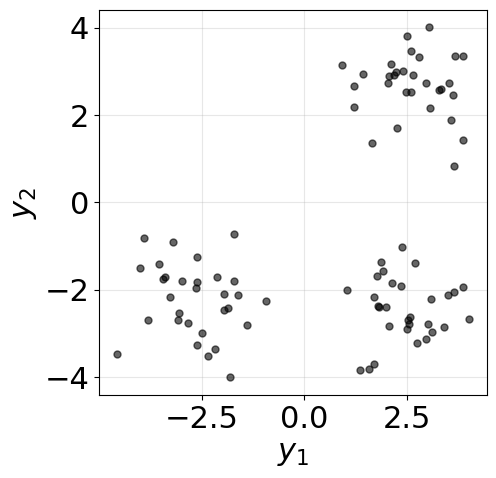

In [ ]:
fig, ax = plt.subplots(figsize=plot.one_figsize)

# Plot data
ax.plot(Y[:, 0], Y[:, 1], '.', color='black', markersize=10, alpha=0.6)
ax.set_xlabel('$y_1$')
ax.set_ylabel('$y_2$')
ax.grid(True, alpha=0.3)

mlai.write_figure(filename="hierarchical_clustering_000.svg", directory="./ml")

In [ ]:
from scipy.cluster.hierarchy import dendrogram

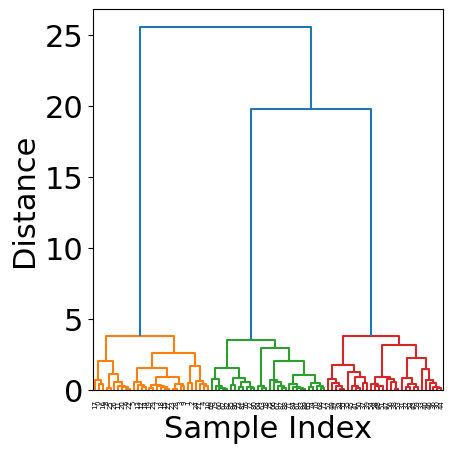

In [ ]:
# Plot dendrogram
fig, ax = plt.subplots(figsize=plot.one_figsize)
dendrogram(linkage_matrix, ax=ax)
ax.set_xlabel('Sample Index')
ax.set_ylabel('Distance')

plt.tight_layout()

mlai.write_figure(filename="hierarchical_clustering_001.svg", directory="./ml")

<table>
<tr>
<td width="40%">

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/hierarchical_clustering_000.svg" class="" width="100%" style="vertical-align:middle;">

</td>
<td width="40%">

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/hierarchical_clustering_001.svg" class="" width="100%" style="vertical-align:middle;">

</td>
</tr>
</table>

Figure: <i>Hierarchical clustering of some artificial data. On the left
we have an artificially generated data set containing three clusters. On
the right we can see the dendogram formed by clustering using Ward’s
criterion.</i>

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots("hierarchical_clustering_{counter:0>3}.svg", directory="./ml",
                            text_top='hierarchical_clustering_{counter:0>3}.tex', counter=(0, 1))

interactive(children=(Text(value='hierarchical_clustering_{counter:0>3}.tex', description='text_top'), IntSlid…

Note that the hierarchical clustering here doesn’t always imply that the
data was hierarchical in origin. It’s a visualisation of distances
between points and clusters. The longer lenghts in the dendogram imply
larger distances. Next We’ll demonstrate agglomerative clustering on the
oil flow data set, which contains measurements from a multiphase flow
facility.

## Oil Flow Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/oil-flow-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/oil-flow-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

This data set is from a physics-based simulation of oil flow in a
pipeline. The data was generated as part of a project to determine the
fraction of oil, water and gas in North Sea oil pipes (Bishop and James,
1993).

In [ ]:
import pods

In [ ]:
data = pods.datasets.oil()

The data consists of 1000 12-dimensional observations of simulated oil
flow in a pipeline. Each observation is labelled according to the
multi-phase flow configuration (homogeneous, annular or laminar).

In [ ]:
# Convert data["Y"] from [1, -1, -1] in each row to rows of 0 or 1 or 2
Y = data["Y"]
# Find rows with 1 in first column (class 0)
class0 = (Y[:, 0] == 1).astype(int) * 0
# Find rows with 1 in second column (class 1)
class1 = (Y[:, 1] == 1).astype(int) * 1
# Find rows with 1 in third column (class 2)
class2 = (Y[:, 2] == 1).astype(int) * 2
# Combine into single array of class labels 0,1,2
labels = class0 + class1 + class2

The data is returned as a dictionary containing training and test inputs
(‘X,’ ‘Xtst’), training and test labels (‘Y,’ ‘Ytst’), and the names of
the features.

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai
import numpy as np

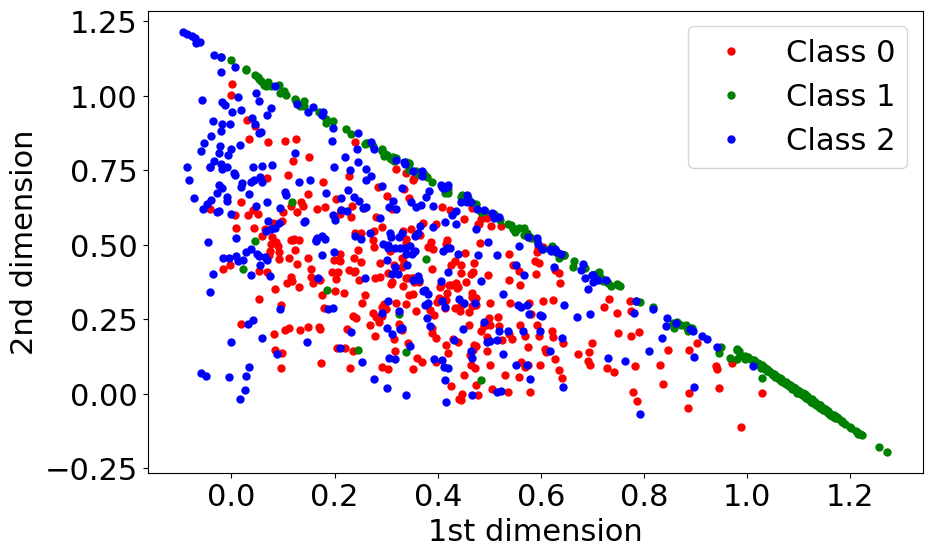

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
# Plot first two dimensions of the data
classes = np.unique(labels)
colors = ['r', 'g', 'b']
for i, cls in enumerate(classes):
    idx = labels == cls
    ax.plot(data['X'][idx, 0], data['X'][idx, 1], colors[i] + '.',
            markersize=10, label=f'Class {cls}')
ax.set_xlabel('1st dimension')
ax.set_ylabel('2nd dimension')
ax.legend()

mlai.write_figure('oil-flow-data.svg', directory='./datasets')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//datasets/oil-flow-data.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Visualization of the first two dimensions of the oil flow
data from Bishop and James (1993)</i>

As normal we include the citation information for the data.

In [ ]:
print(data['citation'])

Bishop, C. M. and G. D. James (1993). Analysis of multiphase flows using dual-energy gamma densitometry and neural networks. Nuclear Instruments and Methods in Physics Research A327, 580-593


And extra information about the data is included, as standard, under the
keys `info` and `details`.

In [ ]:
print(data['details'])

The three phase oil data used initially for demonstrating the Generative Topographic mapping.


In [ ]:
X = data['X']
Y = data['Y']

## Hierarchical Clustering of Oil Flow Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/oil-flow-hierarchical-clustering.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/oil-flow-hierarchical-clustering.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In this example, we’ll apply hierarchical clustering to the oil flow
data set. The data contains measurements from different flow regimes in
a multiphase flow facility. The dendrogram shows how measurements
naturally cluster into different flow types. Ward’s linkage method is
used as it tends to create compact, evenly-sized clusters.

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import pods

In [ ]:
# Perform hierarchical clustering
linked = linkage(X, 'ward')  # Ward's method for minimum variance

In [ ]:
from matplotlib import pyplot as plt
from mlai import plot

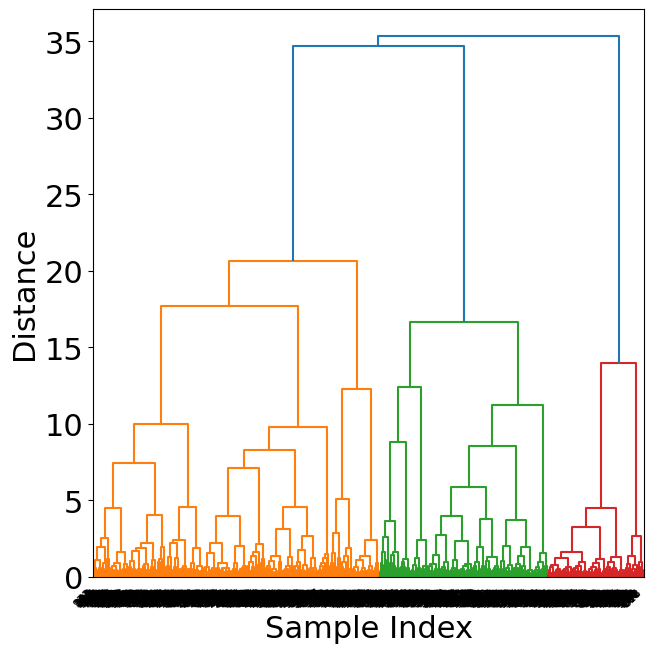

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_figsize)
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_rotation=45,  # Rotate labels
           leaf_font_size=8,  # Reduce font size
           ax=ax)
ax.set_xlabel('Sample Index')
ax.set_ylabel('Distance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
mlai.write_figure('hierarchical-clustering-oil.svg', directory='./dimred')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/hierarchical-clustering-oil.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Hierarchical clustering applied to oil flow data. The
dendrogram shows how different flow regimes are grouped based on their
measurement similarities. The three main flow regimes (homogeneous,
annular, and laminar) should form distinct clusters.</i>

## Phylogenetic Trees

A powerful application of hierarchical clustering is in constructing
phylogenetic trees from genetic sequence data. By comparing DNA/RNA
sequences across species, we can reconstruct their evolutionary
relationships and estimate when species diverged from common
ancestors.[1] The resulting tree structure, called a phylogeny, maps out
the evolutionary history and relationships between organisms.

These phylogenetic methods go beyond simple linkage methods based on
distance, they incorporate models of genetic mutation and molecular
evolution. These models can estimate not just the structure of
relationships, but also the timing of evolutionary divergence events
based on mutation rates. This has important applications in tracking the
origins and spread of rapidly evolving pathogens like Covid19, HIV and
influenza viruses. Understanding viral phylogenies helps epidemiologists
trace outbreak sources, track transmission patterns, and develop
targeted containment strategies.

[1] Phylogenetic models incorporate molecular clock models that estimate
mutation rates over time. By calibrating these with known divergence
events from the fossil record, the timing of common ancestors can be
estimated.}

## Product Clustering

An e-commerce company could apply hierarchical clustering to organize
their product catalog into a taxonomy tree. Products would be grouped
into increasingly specific categories - for example, Electronics might
split into Phones, Computers, etc., with Phones further dividing into
Smartphones, Feature Phones, and so on. This creates an intuitive
hierarchical organization. However, many products naturally belong in
multiple categories - for instance, running shoes could reasonably be
classified as both sporting equipment and footwear. The strict tree
structure of hierarchical clustering doesn’t allow for this kind of
multiple categorization, which is a key limitation for product
organization.

## Hierarchical Clustering Challenge

Our psychological ability to form categories is far more sophisticated
than hierarchical trees. Research in cognitive science has revealed that
humans naturally form overlapping categories and learn abstract
principles that guide classification. Josh Tenenbaum’s work (see e.g.
Lake et al. (2018)) demonstrates how human concept learning combines
multiple forms of inference through hierarchical Bayesian models that
integrate similarity-based clustering with theory-based reasoning.

In practice the simple methods we use for agglomerative clustering to
merge clusters care often used for visualisation of the cluster
structure even when we don’t expect a hieararchy to be present (like the
oil flow data and the artificial data above.

## Thinking in High Dimensions

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/thinking-in-high-dimensions.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/thinking-in-high-dimensions.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

A recurring plot that is shown in talks on machine learning,
particularly those on clustering, is a configuration of data points in
two dimensions such as those below.

At first glance, the data appears quite realistic. The density of the
data points varies considerably as we move around the plot. The data
seems to be clustered, but not in a uniform manner: some clusters are
tighter than others. The clusters also seem to be somewhat randomly
distributed around the plot. At some point during the talk, a slide
containing a fit to the data.

This figure shows the means and variances of a mixture of multivariate
(two dimensional) Gaussian densities (McLachlan and Basford (1988)). The
fit seems to be a good approximation to the data.

Models of this type can also be justified by appeals to our intuition.
The way I like to think of these mixture models is as a summary of the
data by a series of prototypes (represented by the means of the Gaussian
components of the mixture density). These prototypes are subject to
distortions. The density associated with each component represents the
range of distortions that the data can undergo. In the case of the
mixture of Gaussians, the distortions are of the form of adding zero
mean, Gaussian distributed, random noise with a particular covariance
matrix.

## Mixtures of Gaussians

In [ ]:
import matplotlib.pyplot as plt
import mlai
import mlai.plot as plot

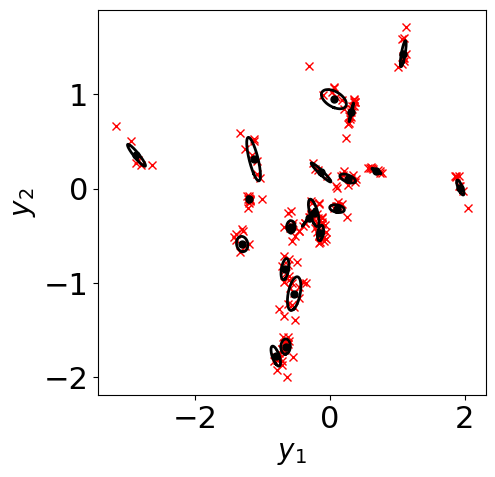

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

num_centres = 20
num_data = 200
centres = np.random.normal(size=(num_centres, 2))
w = np.random.normal(size=(num_centres, 2))*0.1
alloc = np.random.randint(0, num_centres, size=(num_data))
sigma = np.random.normal(size=(num_centres, 1))*0.05
epsilon = np.random.normal(size=(num_data,2))*sigma[alloc, :]

Y = w[alloc, :]*np.random.normal(size=(num_data, 1)) + centres[alloc, :] + epsilon

ax.plot(Y[:, 0], Y[:, 1], 'rx')
ax.set_xlabel('$y_1$', fontsize=20)
ax.set_ylabel('$y_2$', fontsize=20)

mlai.write_figure("artificial-mog-1.svg", directory="./dimred/")
pi_vals = np.linspace(-np.pi, np.pi, 200)[:, None]
for i in range(num_centres):
    ax.plot(centres[i, 0], centres[i, 1], 'o', markersize=5, color=[0, 0, 0], linewidth=2)
    x = np.hstack([np.sin(pi_vals), np.cos(pi_vals)])
    L = np.linalg.cholesky(np.outer(w[i, :],w[i, :]) + sigma[i]**2*np.eye(2))
    el = np.dot(x, L.T)
    ax.plot(centres[i, 0] + el[:, 0], centres[i, 1] + el[:, 1], linewidth=2, color=[0,0,0])
mlai.write_figure("artificial-mog-2.svg", directory="./dimred/")

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/artificial-mog-1.svg" class="" width="40%" style="vertical-align:middle;">

Figure: <i>Two dimensional Gaussian data set.</i>

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/artificial-mog-2.svg" class="" width="40%" style="vertical-align:middle;">

Figure: <i>Two dimensional data sets. Complex structure not a problem
for mixtures of Gaussians.</i>

# High Dimensional Data

## Thinking in High Dimensions

Such a model seems intuitively appealing. When the *expectation
maximization* approach to optimizing such powerful models was first
described by the statistics community it must have seemed to some that
the main remaining challenge for density estimation was principally
computational. There are, of course, applications for which for which a
mixture of Gaussians is an appropriate model (e.g. low dimensional
data). Such applications are not the focus of *this* lecture. We are
more interested in the failings of the Gaussian mixture. There are two
foundation assumptions which underpin this model. We described them both
in our early appeal to intuition. The first assumption is that the data
is generated through prototypes. We will not consider this assumption
further. We will focus on the second assumption: how the prototypes are
corrupted to obtain the data we observe. For the Gaussian mixture model
the prototypes are corrupted by Gaussian noise with a particular
covariance. It is this second assumption that we would like to consider
first. In particular, we are going to examine the special case where the
covariance is given by a constant diagonal matrix. We will see that the
behavior of a Gaussian in low dimensional space can be quite misleading
when we develop intuitions as to how these densities behave in higher
dimensions. By higher dimensionality we can think of dimensionality that
is difficult to visualize directly, *i.e.* dimensionality greater than
$d=3$.

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/distance2.svg" class="" width="40%" style="vertical-align:middle;">

Figure: <i>Distance from mean of the density (circle) to a given data
point (square).</i>

## Dimensionality Greater than Three

In higher dimensions *models* that seem reasonable in two or three
dimensions can fail dramatically. Note the emphasis on models. In this
section, we are not making any statements about how a \`realistic’ data
set behaves in higher dimensions, we are making statements about
modeling failures in higher dimensions. In particular we will focus on
what assumptions the model makes about where the data is distributed in
higher dimensions. We will illustrate the ideas through introducing the
Gaussian egg. The Gaussian egg is a hard boiled egg that consists of
three parts: the yolk of the egg, the white of the egg and a thin
boundary shell between the yolk and the white. In an over boiled egg the
boundary layer is often green from iron sulfide formed by reactions
between the white and the yolk, giving a bad taste. We therefore refer
to this as the \`\`green’’ of the egg. We will consider spherical
Gaussian distributions which have covariance matrices of the form
$\sigma^2\mathbf{I}$. We define the volume of the density associated
with the yolk as part of the egg that is within $0.95\sigma$ of the
mean. The green is defined to be the region from $0.95\sigma$ to
$1.05\sigma$. Finally, the yolk is all the density beyond $1.05\sigma$.
We assume the density of the egg varies according to the Gaussian
density, so that the density at the center of the egg is highest, and
density falls off with the exponentiated negative squared Euclidean
distance from the mean. We take the overall mass of our egg to be one.
The question we now ask is how much of our egg’s mass is now taken up by
the three component parts: the green, the white and the yolk. The
proportions of the mass are dependent on the dimensionality of our egg.

## The Gaussian Egg

-   See also Exercise 1.4 in Bishop (1995)

In [ ]:
import mlai.plot as plot

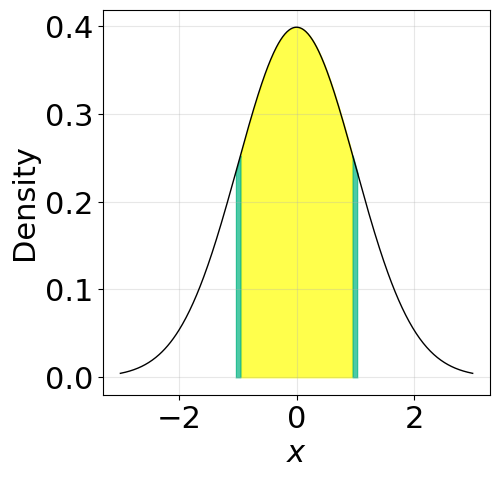

In [ ]:
plot.gaussian_volume_1D(directory='./dimred/')

The answer is found through integrating over the Gaussian. For a one
dimensional egg we can find the portion of the Gaussian that sits inside
0.95 of a standard deviation’s distance from the mean as $$
\int_{-0.95\sigma}^{0.95\sigma} \mathscr{N}\left(y|0,\sigma^{2}\right) \text{d}y.
$$ The other portions can be found similarly. For higher dimensional
Gaussians the integral is slightly more difficult. To compute it, we
will switch from considering the Gaussian density that governs the data
directly to the density over squared distances from the mean that the
Gaussian implies. Before we introduce that approach, we show three low
dimensional Gaussian eggs below indicating their associated masses for
the yolk, the green, the white and the shell.

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/gaussian-volume-1D.svg" class="" width="40%" style="vertical-align:middle;">

Figure: <i>Volumes associated with the one dimensional Gaussian egg.
Here the yolk has 65.8%, the green has 4.8% and the white has 29.4% of
the mass.</i>

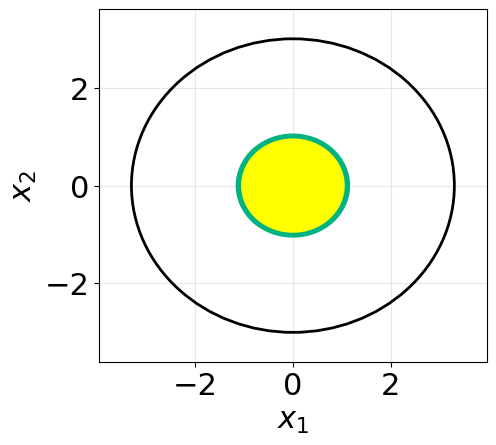

In [ ]:
plot.gaussian_volume_2D(directory='./dimred/')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/gaussian-volume-2D.svg" class="" width="40%" style="vertical-align:middle;">

Figure: <i>Volumes associated with the regions in the two dimensional
Gaussian egg. The yolk contains 59.4%, the green contains 7.4% and the
white 33.2%.</i>

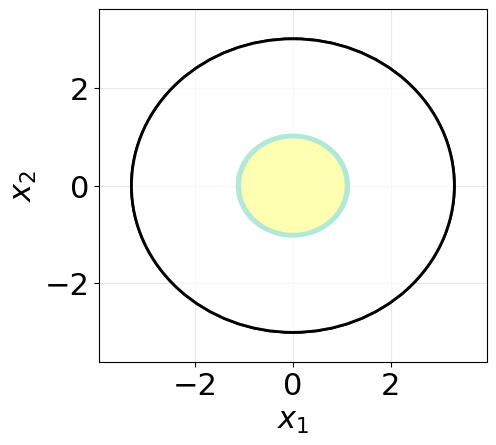

In [ ]:
plot.gaussian_volume_3D(directory='./dimred/')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/gaussian-volume-3D.svg" class="" width="40%" style="vertical-align:middle;">

Figure: <i>Volumes associated with the regions in the three dimensional
Gaussian egg. Here the yolk has 56.1% the green has 9.2% the white has
34.7%.</i>

## The Gamma Density

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_statistics/includes/the-gamma-density.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_statistics/includes/the-gamma-density.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The Gamma is a density over positive numbers. It has the form $$
\mathscr{G}\left(x|a,b\right)=\frac{b^{a}}{\Gamma\left(a\right)}x^{a-1}e^{-bx},
$$ where $a$ is known as the shape parameter and $b$ is known as a rate
parameter. The function $\Gamma\left(a\right)$ is known as the gamma
function and is defined through the following indefinite integral, $$
\Gamma\left(a\right)=\int_{0}^{\infty}x^{a-1}e^{-x}\text{d}x.
$$ The mean of the gamma density is given by $$
\left\langle x \right\rangle _{\mathscr{G}\left(x|a,b\right)}=\frac{a}{b}
$$ and the variance is given by $$
\text{var}_{\mathscr{G}\left(x|a,b\right)}\left( x \right)=\frac{a}{b^{2}}.
$$ Sometimes the density is defined in terms of a scale parameter,
$\beta=b^{-1}$, instead of a rate. Confusingly, this parameter is also
often denoted by “$b$.” For example, the statistics toolbox in Matlab
defines things this way. The gamma density generalises several important
special cases including the exponential density with rate $b$,
$\left\langle x\right\rangle_{b}$, which is the specific case where the
shape parameter is taken to be $a=1$. The chi-squared density with one
degree of freedom, denoted $\chi_{1}^{2}\left(x\right)$, is the special
case where the shape parameter is taken to be $a=\frac{1}{2}$ and the
rate parameter is $b=\frac{1}{2}$.

The gamma density is the conjugate density for the inverse variance
(precision) of a Gaussian density.

Gamma random variables have the property that, if multiple gamma
variates are sampled from a density with the same rate, $b$, and shape
parameters $\left\{a_k\right\}^d_{k=1}$, then the sum of those variates
is also Gamma distributed with rate parameter $b$ and shape parameter
$a^\prime = \sum_{k=1}^da_k$.

## Summary

The gamma density is a flexible probability distribution over positive
numbers with two parameters: shape ($a$) and rate ($b$). The shape
parameter controls the form of the distribution, while the rate
parameter controls the scale. The mean and variance are both
proportional to the shape parameter, with the mean being $a/b$ and
variance being $a/b^2$. The gamma function $\Gamma(a)$ serves as the
normalizing constant.

The gamma density generalizes several important distributions. When the
shape parameter $a=1$, it becomes the exponential distribution with rate
$b$. When $a=\frac{1}{2}$ and $b=\frac{1}{2}$, it becomes the
chi-squared distribution with one degree of freedom. The gamma
distribution is particularly important in Bayesian statistics as the
conjugate prior for the precision (inverse variance) of Gaussian
distributions, making it essential for Bayesian inference about variance
parameters.

Gamma distributions have a useful additive property: the sum of
independent gamma random variables with the same rate parameter is also
gamma distributed, with the shape parameter being the sum of the
individual shape parameters. This property is crucial for many
applications in statistics and probability. However, be careful with
parameterization - some software uses a scale parameter $\beta = b^{-1}$
instead of the rate parameter $b$, which can lead to confusion when
implementing gamma distributions in different programming environments.

## Distribution of Mass against Dimensionality

For the three low dimensional Gaussians, we note that the allocation of
the egg’s mass to the three zones changes as the dimensionality
increases. The green and the white increase in mass and the yolk
decreases in mass. Of greater interest to us is the behavior of this
distribution of mass in higher dimensions. It turns out we can compute
this through the cumulative distribution function of the gamma density.

We will compute the distribution of the density mass in the three
regions by assuming each data point is sampled independently from our
spherical covariance Gaussian density, \[ *{i, :} \] where
$\mathbf{ y}_{i, :}$ is the $i$th data point. Independence across
features also means we can consider the density associated with the
$k$th feature of the $i$th data point, $y_{i,k}$, \[ *{i,k}. \] We are
interested in the squared distance of any given sample from the mean.
Our choice of a zero mean Gaussian density means that the squared
distance of each feature from the mean is easily computed as
$y_{i,k}^2$. We can exploit a useful characteristic of the Gaussian to
describe the density of these squared distances. The squares of a
Gaussian distributed random variable are known to be distributed
according the *chi-squared density*, \[ *{i,k}<sup>{2}</sup>{2}*{1}^{2},
\] The chi squared density is a special case of the gamma density with
shape parameter $a=\frac{1}{2}$ and rate parameter
$b=\frac{1}{2\sigma^{2}}$, $$
\mathscr{G}\left(x|a,b\right)=\frac{b^{a}}{\Gamma\left(a\right)}x^{a-1}e^{-bx}.
$$

## chi-squared Distributions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, chi2
import mlai
import mlai.plot as plot

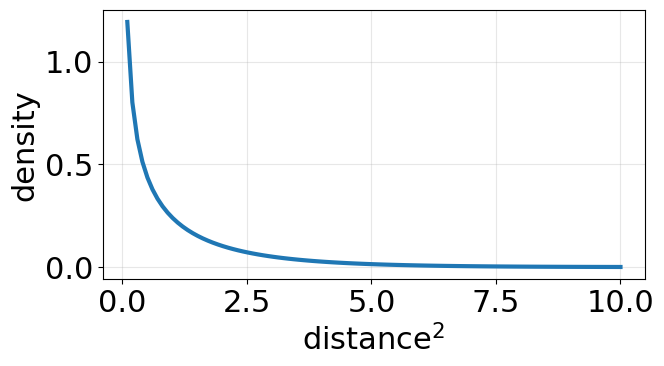

In [ ]:
fig, ax = plt.subplots(figsize=plot.wide_figsize)

x = np.linspace(0, 10, 100)
chi2_1d = chi2.pdf(x, df=1)
ax.plot(x, chi2_1d, '-', linewidth=3)
ax.set_xlabel(r'$\text{distance}^2$')
ax.set_ylabel('density')
ax.grid(True, alpha=0.3)

mlai.write_figure(filename="chi-squared-1d.svg", directory="./dimred")

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/chi-squared-1d.svg" class="" width="70%" style="vertical-align:middle;">

Figure: <i>The $\chi^2$ distribution which gives the distribution of the
square of a standardised normal variable $z^2$.</i>

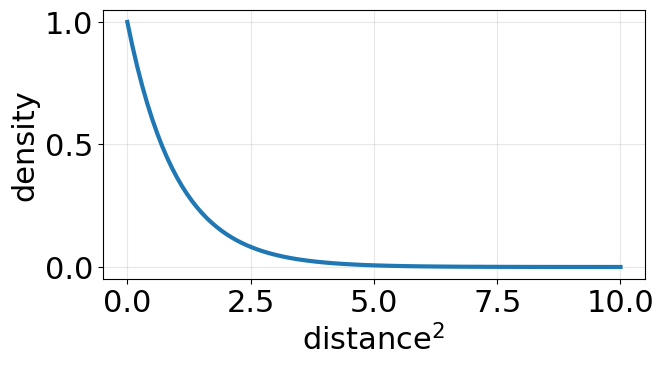

In [ ]:
fig, ax = plt.subplots(figsize=plot.wide_figsize)

gamma_2d = gamma.pdf(x, a=1, scale=1)
ax.plot(x, gamma_2d, '-', linewidth=3)
ax.set_xlabel(r'$\text{distance}^2$')
ax.set_ylabel('density')
ax.grid(True, alpha=0.3)

mlai.write_figure(filename="gamma-2d.svg", directory="./dimred")

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/gamma-2d.svg" class="" width="70%" style="vertical-align:middle;">

Figure: <i>The scaled $\chi^2$ squared, equivalent to the sum of two
standardised normal variables $z_1^2 + z_2^2$.</i>

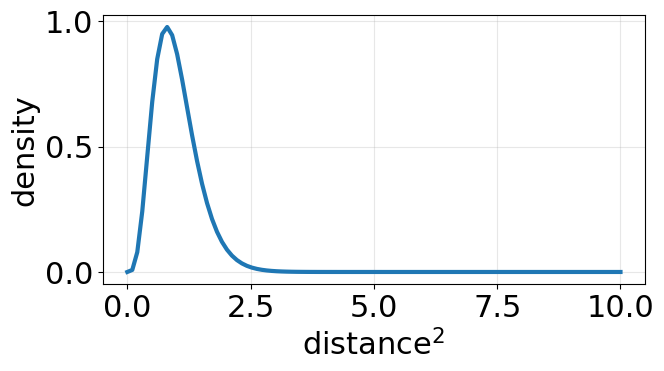

In [ ]:
fig, ax = plt.subplots(figsize=plot.wide_figsize)

gamma_high = gamma.pdf(x, a=5, scale=0.2)
ax.plot(x, gamma_high, '-', linewidth=3)
ax.set_xlabel(r'$\text{distance}^2$')
ax.set_ylabel('density')
ax.grid(True, alpha=0.3)

mlai.write_figure(filename="gamma-5d.svg", directory="./dimred")

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/gamma-5d.svg" class="" width="70%" style="vertical-align:middle;">

Figure: <i>The scaled $\chi^2$ squared, equivalent to the sum of five
standardised normal variables $\sum_{i=1}^5 z^2_i$.</i>

In [ ]:
import numpy as np
from scipy.stats import gamma

In [ ]:
# Set up dimensions
x = np.arange(0, 11)
D = 2.0**x
lim1 = 0.95
lim2 = 1.05
lim3 = 100

# Compute values of cumulative gammas
y = gamma.cdf(lim1*lim1, D/2, scale=2/D)
y2 = gamma.cdf(lim2*lim2, D/2, scale=2/D)
y3 = gamma.cdf(lim3*lim3, D/2, scale=2/D)

In [ ]:
import matplotlib.pyplot as plt
import mlai
import mlai.plot as plot

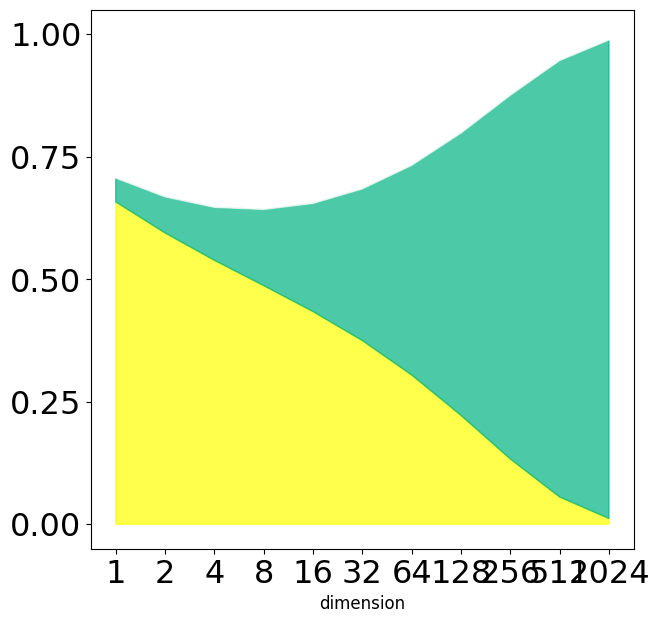

In [ ]:
# Create figure
fig, ax = plt.subplots(figsize=plot.big_figsize)

# Compute patch outlines
xp1 = np.concatenate([[x[0]], x, [x[-1]], [x[0]]])
p1 = np.concatenate([[0], y, [0], [0]])
xp2 = np.concatenate([[x[0]], x, x[::-1]])
p2 = np.concatenate([[y[0]], y2, y[::-1]])
xp3 = np.concatenate([[x[0]], x, x[::-1]])
p3 = np.concatenate([[y2[0]], y3, y2[::-1]])

# Draw patches
ax.fill(xp1, p1, color=[1, 1, 0], alpha=0.7)
ax.fill(xp2, p2, color=[0, 0.7, 0.5], alpha=0.7)
ax.fill(xp3, p3, color=[1, 1, 1], alpha=0.7)

# Set exponentiated labels
ax.set_xticks(x)
ax.set_xticklabels([str(int(2**xi)) for xi in x])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xlabel('dimension', fontsize=12)
ax.tick_params(labelsize=23)

mlai.write_figure(filename='dimension-mass.svg',
                  directory='./dimred')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/dimension-mass.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Plot of probability mass versus dimension. Plot shows the
volume of density inside 0.95 of a standard deviation (yellow), between
0.95 and 1.05 standard deviations (green), over 1.05 and standard
deviations (white).</i>

So we have the squared distance from the mean for a single feature being
given by $$
y_{i,k}^{2}\sim\mathscr{G}\left(\frac{1}{2},\frac{1}{2\sigma^{2}}\right).
$$ Of course, we are interested in the distance from the mean of the
data point given by
$\mathbf{ y}_{i,:}=\left[y_{i,1}, \dots, y_{i,d}\right]^\top$. The
distance from the mean of the $i$th data point will be given by
$\sum_{k=1}^dy_{i,k}^2$. Fortunately, the properties of the gamma
density (see ) mean we can also compute the density of the resulting
random variable, in particular we have $$
\sum_{k=1}^{d} y_{i,k}^{2}\sim\mathscr{G}\left(\frac{d}{2},\frac{1}{2\sigma^{2}}\right).
$$ We can compute the mean and standard deviation of the squared
distance for each point from the mean, $$
\left\langle \sum_{k=1}^{d} y_{i,k}^{2} \right\rangle =d\sigma^{2},
$$ which, we note, scales linearly with the dimensionality of the data.
The average squared distance of each feature will be distributed as
follows, $$
\frac{1}{d}\sum_{k=1}^{d}y_{i,k}^{2}\sim\mathscr{G}\left(\frac{d}{2},\frac{d}{2\sigma^{2}}\right)
$$ the mean for which is simply the variance of the underlying Gaussian
density, $$
\left\langle \frac{1}{d}\sum_{k=1}^{d} y_{i,k}^{2} \right\rangle =\sigma^{2}.
$$ We can use this gamma density to work out how much of the mass of the
Gaussian egg is in the different zones. The cumulative distribution
function for the gamma density, $$
\mathscr{GAMMA CDF}\left(z|a,b\right) = \int_0^{x}\mathscr{G}\left(z|a,b\right) \text{d} z,
$$ doesn’t have a nice analytical form, but implementations of it are
provided for many programming languages including R, , Octave and
Python. We can use the cumulative distribution to give the probability
of the squared distance falling under a certain value. For the data
point to be in the yolk, we expect its squared distance from the mean to
be under $(0.95\sigma)^2$. For the data point to be in the green we
expect its squared distance from the mean to be between
$(0.95/\sigma)^2$ and $(1.05/\sigma)^2$. Data in the white will have a
squared distance from the mean greater than $(1.05/\sigma)^2$.

## Looking at Gaussian Samples

The theory has shown us that data sampled from a Gaussian density in
very high dimensions will live in a shell around one standard deviation
from the mean of the Gaussian. This is perhaps surprising because we are
used to thinking of Gaussians being distributions where most of the data
is near the mean of the density. But this is because we are used to
looking at low dimensional Gaussian densities. In this regime most of
the data is near the mean. One useful property of the Gaussian density
is that all the marginal densities are also Gaussian. This means that
when we see a two dimensional Gaussian we can think of it as a three
dimensional Gaussian with one dimension marginalized. The effect of this
marginalization is to project the third dimension down onto the other
two by summing across it. This means when we see a two dimensional
Gaussian on a page such as that in , we can think of a corresponding
three dimensional Gaussian which has this two dimensional Gaussian as a
marginal. That three dimensional Gaussian would have data going into and
coming out of the page. The projection down to two dimensions makes that
data look like it is close to the mean, but when we expand up to the
three dimensional Gaussian some of that data moves away from the mean.
Following this line of argument, we can ask what if the plot is the two
dimensional marginal of a truly four dimensional Gaussian. Now some more
of the data that appears close to the mean in the two dimensional
Gaussian (and perhaps was close to the mean in the three dimensional
Gaussian) is also projected away. We can continue applying this argument
until we can be certain that there is no data left near the mean. So the
gist of the argument is as follows. When you are looking at a low
dimensional projection of a high dimensional Gaussian, it does appear
that there is a large amount of data close to the mean. But, when we
consider that the data near the mean has been projected down from
potentially many dimensions we understand that in fact there is very
little data near the mean.

In [ ]:
import numpy as np

In [ ]:
# Generate random covariance matrix
np.random.seed(24)  # For reproducibility
a = np.random.randn(2, 2)
cov_matrix = a @ a.T

# Sample from multivariate Gaussian
mean = np.array([0, 0])
Y = np.random.multivariate_normal(mean, cov_matrix, 300)

In [ ]:
import matplotlib.pyplot as plt
import mlai
import mlai.plot as plot

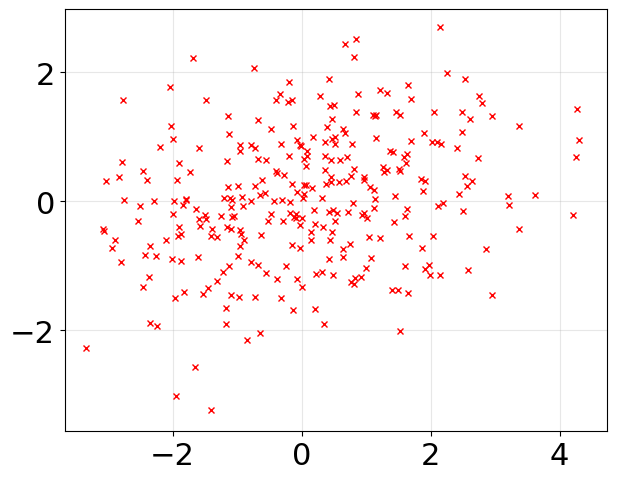

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_figsize)
ax.plot(Y[:, 0], Y[:, 1], 'rx', markersize=4, linewidth=3)
ax.set_xlim([Y[:, 0].min()*1.1, Y[:, 0].max()*1.1])
ax.set_ylim([Y[:, 1].min()*1.1, Y[:, 1].max()*1.1])
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)

mlai.write_figure(filename='projected-2d-gaussian.svg',
                  directory='./dimred')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/projected-2d-gaussian.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Looking at a projected Gaussian. This plot shows, in two
dimensions, samples from a potentially very high dimensional Gaussian
density. The mean of the Gaussian is at the origin. There appears to be
a lot of data near the mean, but when we bear in mind that the original
data was sampled from a much higher dimensional Gaussian we realize that
the data has been projected down to the mean from those other dimensions
that we are not visualizing.</i>

## High Dimensional Gaussians and Interpoint Distances

Our analysis above showed that for spherical Gaussians in high
dimensions the density of squared distances from the mean collapses
around the expected value of one standard deviation. Another related
effect is the distribution of *interpoint* squared distances. It turns
out that in very high dimensions, the interpoint squared distances
become equal. This has knock on effects for many learning algorithms:
for example in nearest neighbors classification algorithms a test data
point is assigned a label based on the labels of the $k$ nearest
neighbors from the training data. If all interpoint squared distances
were close to equal then the stability of these $k$ neighbors with
respect to small data perturbations would be poor.

Can show this for Gaussians with a similar proof to the above, $$
y_{i,k}\sim\mathscr{N}\left(0,\sigma_{k}^{2}\right)\quad\quad y_{j,k}\sim\mathscr{N}\left(0,\sigma_{k}^{2}\right)
$$ $$
y_{i,k}-y_{j,k}\sim\mathscr{N}\left(0,2\sigma_{k}^{2}\right)]
$$ $$
\left(y_{i,k}-y_{j,k}\right)^{2}\sim\mathscr{G}\left(\frac{1}{2},\frac{1}{4\sigma_{k}^{2}}\right)
$$ Once again we can consider the specific case where the data is
spherical, $\sigma_{k}^{2}=\sigma^{2}$, as we can always individually
rescale the data input dimensions to ensure this is the case $$
\sum_{k=1}^{d}\left(y_{i,k}-y_{j,k}\right)^{2}\sim\mathscr{G}\left(\frac{d}{2},\frac{1}{4\sigma^{2}}\right)
$$ $$
\frac{1}{d}\sum_{k=1}^{d}\left(y_{i,k}-y_{j,k}\right)^{2}\sim\mathscr{G}\left(\frac{d}{2},\frac{D}{4\sigma^{2}}\right)
$$ The dimension normalized squared distance between points is Gamma
distributed. Mean is $2\sigma^{2}$. Variance is $\frac{8\sigma^{2}}{d}$.

## Example Data Sets

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/dimred-example-datasets.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/dimred-example-datasets.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

{**Data sampled from independent Gaussian distribution**

-   If dimensions are independent, we expect low variance, Gaussian
    behavior for the distribution of squared distances.

In [ ]:
import numpy as np

In [ ]:
# Generate 1000D Gaussian data
np.random.seed(22)
Y = np.random.randn(1000, 1000)

In [ ]:
import mlai
import mlai.plot

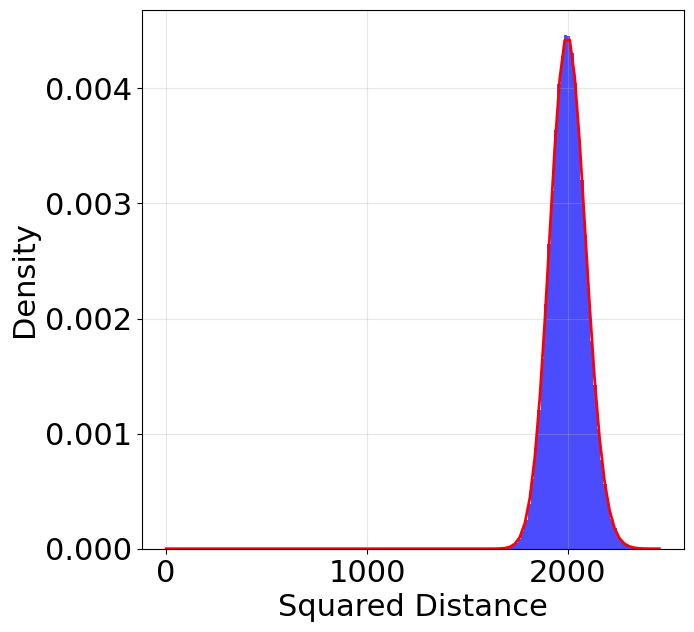

In [ ]:
plot.squared_distances(Y, 'gaussian-distances-1000', 'Gaussian Distances (1000D, 1000 points)', directory='./dimred')

Figure: <i>A good match betwen theory and the samples for a 1000
dimensional Gaussian distribution.</i>

In [ ]:
import numpy as np

In [ ]:
# Generate 1000D Gaussian data with 100 points
np.random.seed(22)
Y = np.random.randn(100, 1000)

In [ ]:
import mlai.plot as plot

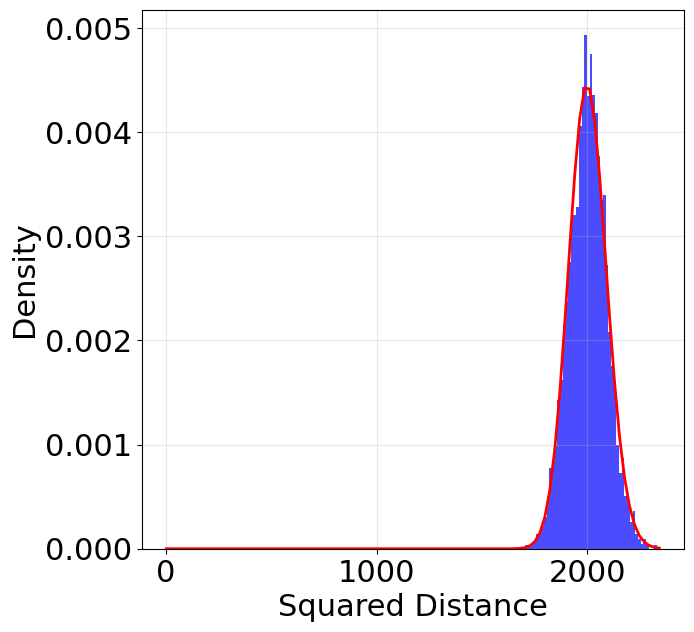

In [ ]:
plot.squared_distances(Y, 'gaussian-distances-100', 'Gaussian Distances (1000D, 100 points)', directory='./dimred')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/gaussian-distances-100.svg" class="" width="40%" style="vertical-align:middle;">

Figure: <i>A good match betwen theory and the samples for a 100
dimensional Gaussian distribution.</i>

<center>

Simulation of oil flow

</center>

In [ ]:
Y = data["Y"]

In [ ]:
import mlai.plot as plot

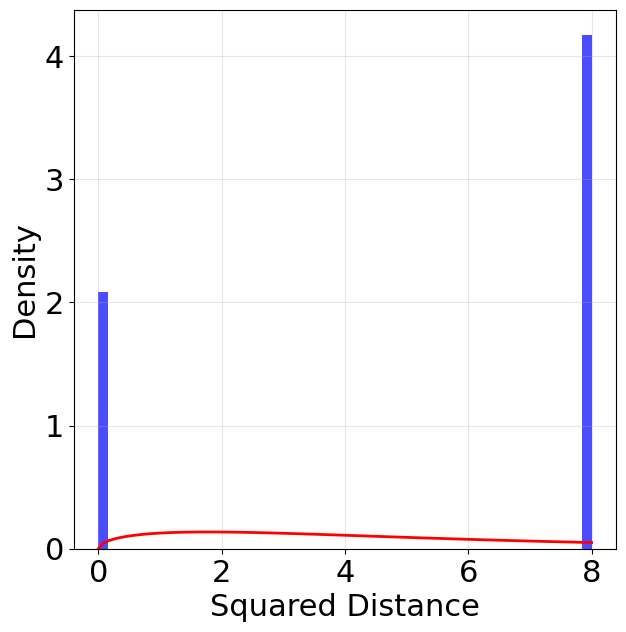

In [ ]:
plot.squared_distances(Y, "oil-flow", "", directory="./dimred")

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/oil-flow_squared_distance.svg" class="oil-flow-squared-distance-plot" width="Histogram of interpoint squared distance distribution for . The theoretical curve from the Gamma distribution is superimposed on the histogram." style="vertical-align:middle;">

Figure: <i></i>

:::

## OSU Motion Capture Data: Run 1

Motion capture data the Open Motion Data Project by The Ohio State
University Advanced Computing Center for the Arts and Design.
Historically the data website was found here
<http://accad.osu.edu/research/mocap/mocap_data.htm>, although it is now
missing. The centre website is here: <https://accad.osu.edu>.

In [ ]:
import pods

You can download different data from the site, here we download the
‘run1’ motion.

In [ ]:
data = pods.datasets.osu_run1()

The data dictionary contains the keys ‘Y’ and ‘connect,’ which represent
the data and connections that can be used to create the skeleton.

In [ ]:
data['Y'].shape

(54, 102)

The data has often been used in talks demonstrating GP-LVM models and
comparing variants such as back constrained and temporal models.

In [ ]:
print(data['citation'])

The Open Motion Data Project by The Ohio State University Advanced Computing Center for the Arts and Design, originally found at http://accad.osu.edu/research/mocap/mocap_data.htm.


And extra information about the data is included, as standard, under the
keys under `details`.

In [ ]:
print(data['details'])

Motion capture data of a stick man running from the Open Motion Data Project at Ohio State University.


<center>

Ohio State University motion capture

</center>

In [ ]:
Y = data["Y"]

In [ ]:
import mlai.plot as plot

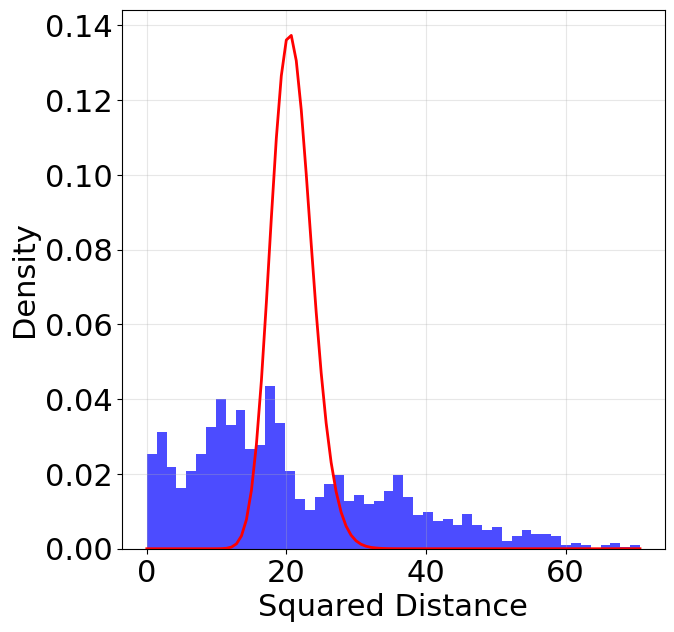

In [ ]:
plot.squared_distances(Y, "osu-run1", "", directory="./dimred")

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/osu-run1_squared_distance.svg" class="osu-run1-squared-distance-plot" width="Histogram of interpoint squared distance distribution for . The theoretical curve from the Gamma distribution is superimposed on the histogram." style="vertical-align:middle;">

Figure: <i></i>

<!--include{_datasets/includes/spellman-yeast-data.md}
includesquareddistance{spellman-yeast}{Spellman yeast cell cycle}{}-->

## Della Gatta Gene Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/della-gatta-gene-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/della-gatta-gene-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

-   Given given expression levels in the form of a time series from
    Della Gatta et al. (2008).

In [ ]:
import numpy as np
import pods

In [ ]:
data = pods.datasets.della_gatta_TRP63_gene_expression(data_set='della_gatta',gene_number=937)

x = data['X']
y = data['Y']

offset = y.mean()
scale = np.sqrt(y.var())

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

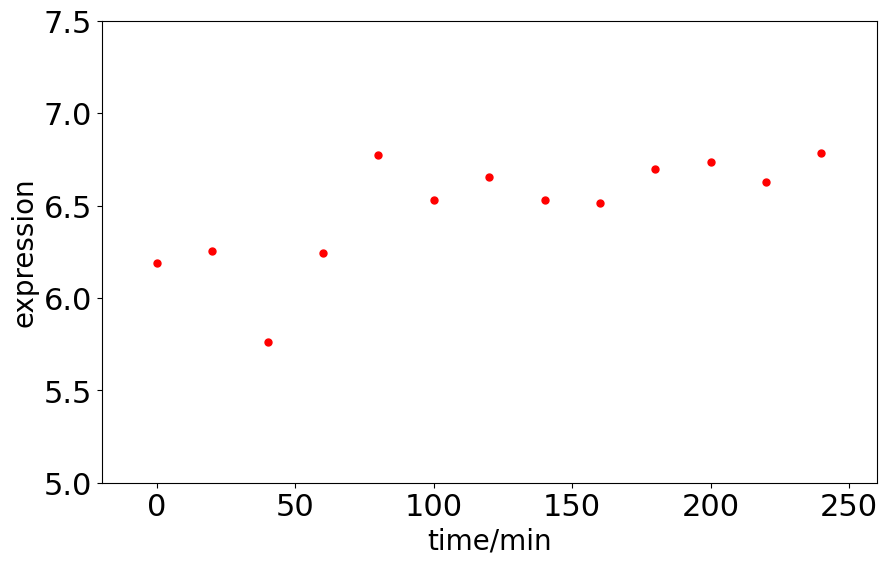

In [ ]:
xlim = (-20,260)
ylim = (5, 7.5)
yhat = (y-offset)/scale

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('time/min', fontsize=20)
ax.set_ylabel('expression', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

mlai.write_figure(figure=fig,
                  filename='./datasets/della-gatta-gene.svg',
                  transparent=True,
                  frameon=True)

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//datasets/della-gatta-gene.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Gene expression levels over time for a gene from data
provided by Della Gatta et al. (2008). We would like to understand
whether there is signal in the data, or we are only observing noise.</i>

<center>

Della Gatta gene expression

</center>

In [ ]:
Y = data["Y"]

In [ ]:
import mlai.plot as plot

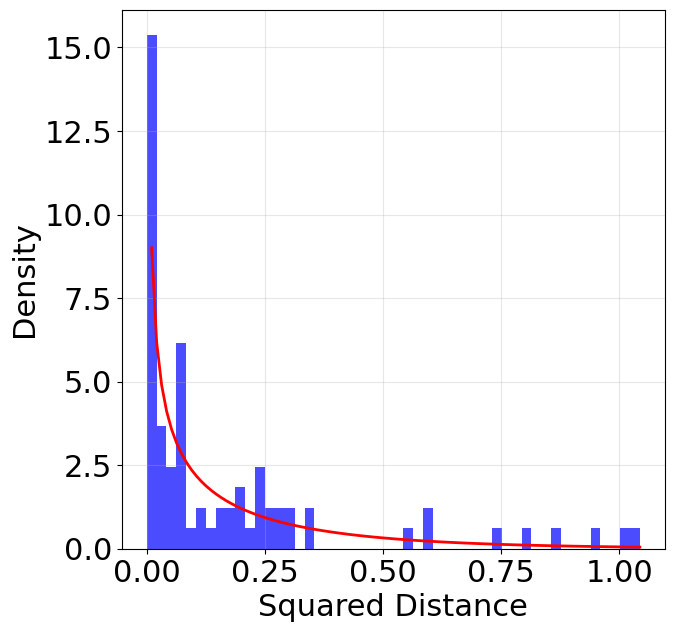

In [ ]:
plot.squared_distances(Y, "della-gatta-gene", "", directory="./dimred")

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/della-gatta-gene_squared_distance.svg" class="della-gatta-gene-squared-distance-plot" width="Histogram of interpoint squared distance distribution for . The theoretical curve from the Gamma distribution is superimposed on the histogram." style="vertical-align:middle;">

Figure: <i></i>

## Robot Wireless Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/robot-wireless-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/robot-wireless-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The robot wireless data is taken from an experiment run by Brian Ferris
at University of Washington. It consists of the measurements of WiFi
access point signal strengths as Brian walked in a loop. It was
published at IJCAI in 2007 (Ferris et al., 2007).

In [ ]:
import pods
import numpy as np

In [ ]:
data=pods.datasets.robot_wireless()

The ground truth is recorded in the data, the actual loop is given in
the plot below.

In [ ]:
import matplotlib.pyplot as plt
import mlai
import mlai.plot as plot

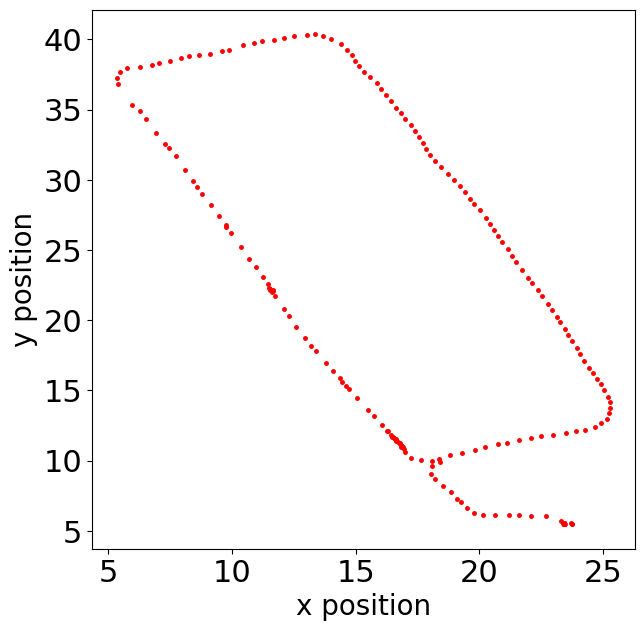

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_figsize)
plt.plot(data['X'][:, 1], data['X'][:, 2], 'r.', markersize=5)
ax.set_xlabel('x position', fontsize=20)
ax.set_ylabel('y position', fontsize=20)
mlai.write_figure(figure=fig,
                  filename='robot-wireless-ground-truth.svg',
                  directory='./datasets')

## Robot Wireless Ground Truth

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//datasets/robot-wireless-ground-truth.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Ground truth movement for the position taken while recording
the multivariate time-course of wireless access point signal
strengths.</i>

We will ignore this ground truth in making our predictions, but see if
the model can recover something similar in one of the latent layers.

In [ ]:
import matplotlib.pyplot as plt
import mlai
import mlai.plot

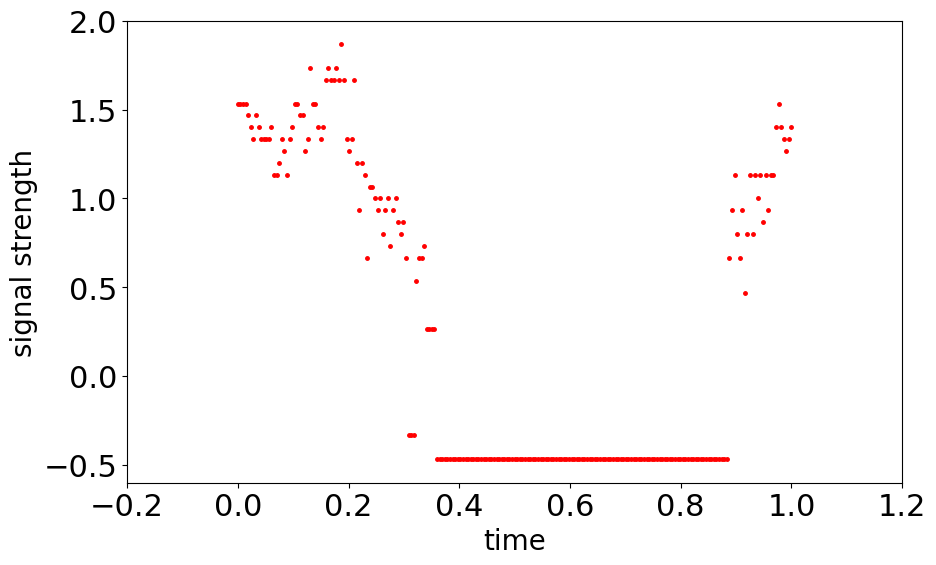

In [ ]:
output_dim=1
xlim = (-0.3, 1.3)
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(np.linspace(0,1,215),
            data['Y'][:, output_dim],
            'r.', markersize=5)

ax.set_xlabel('time', fontsize=20)
ax.set_ylabel('signal strength', fontsize=20)
xlim = (-0.2, 1.2)
ylim = (-0.6, 2.0)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

mlai.write_figure(figure=fig,
                filename='robot-wireless-dim-' + str(output_dim) + '.svg',
                directory='./datasets')

## Robot WiFi Data

One challenge with the data is that the signal strength ‘drops out.’
This is because the device only tracks a limited number of wifi access
points, when one of the access points falls outside the track, the value
disappears (in the plot below it reads -0.5). The data is missing, but
it is not missing at random because the implication is that the wireless
access point must be weak to have dropped from the list of those that
are tracked.

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//datasets/robot-wireless-dim-1.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Output dimension 1 from the robot wireless data. This plot
shows signal strength changing over time.</i>

<center>

Robot wireless navigation

</center>

In [ ]:
Y = data["Y"]

In [ ]:
import mlai.plot as plot

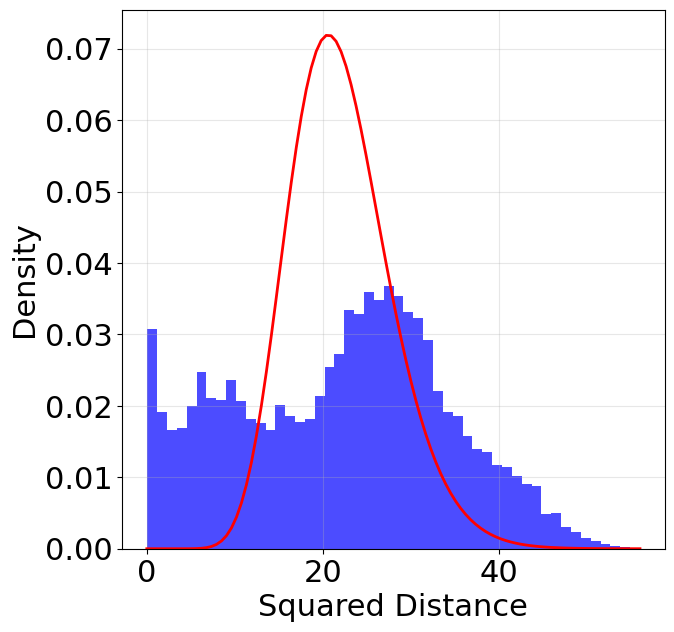

In [ ]:
plot.squared_distances(Y, "robot-wireless", "", directory="./dimred")

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/robot-wireless_squared_distance.svg" class="robot-wireless-squared-distance-plot" width="Histogram of interpoint squared distance distribution for . The theoretical curve from the Gamma distribution is superimposed on the histogram." style="vertical-align:middle;">

Figure: <i></i>

In [ ]:
import numpy as np

In [ ]:
# Create low-rank covariance matrix
np.random.seed(22)
W = np.random.randn(1000, 2)
cov_matrix = W @ W.T + 1e-2 * np.eye(1000)

# Sample from correlated Gaussian
mean = np.zeros(1000)
Y = np.random.multivariate_normal(mean, cov_matrix, 1000)

In [ ]:
from mlai import plot

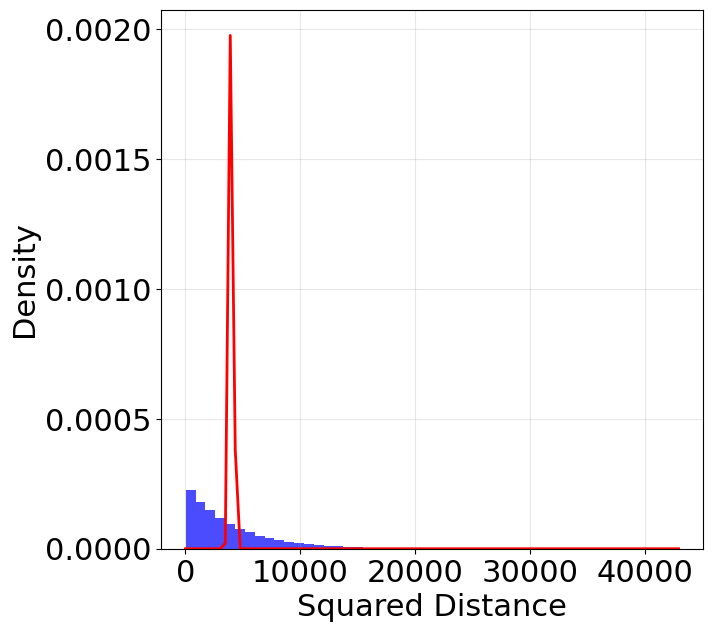

In [ ]:
plot.squared_distances(Y, 'correlated-gaussian-distances-1000', 'Correlated Gaussian (1000D)', directory='./dimred')

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.stats import gamma

In [ ]:
# Normalize data to have variance 1 for each dimension
varY = np.var(Y, axis=0)
stdY = np.sqrt(varY)
Y_normalized = Y / stdY

# Compute distances
distances = pdist(Y_normalized, metric='sqeuclidean')
v = distances[distances > 1e-10]  # Remove very small distances

# Normalize distances
v = 2 * v / np.mean(v)

In [ ]:
import matplotlib.pyplot as plt
import mlai

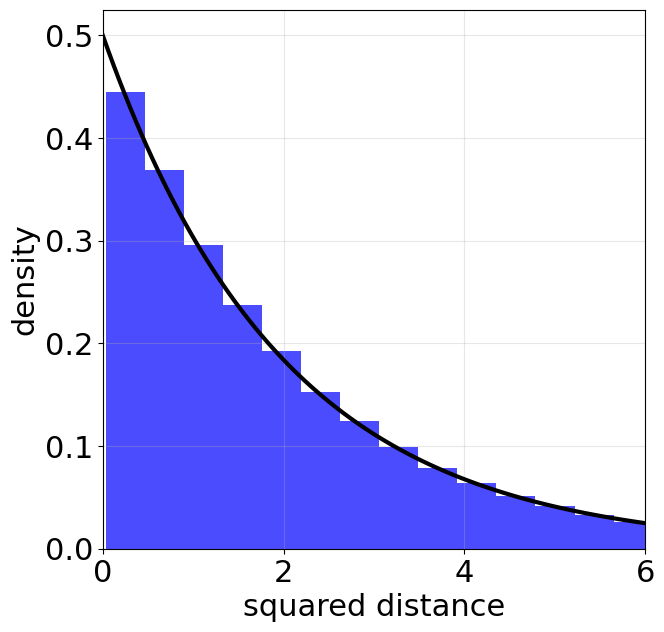

In [ ]:
# Create histogram
fig, ax = plt.subplots(figsize=plot.big_figsize)
vals, x = np.histogram(v, bins=50, density=True)
x_centers = (x[:-1] + x[1:]) / 2
ax.bar(x_centers, vals, alpha=0.7, color='blue', width=x[1]-x[0])

# Theoretical gamma distribution (assuming effective dimension of 2)
x_theory = np.linspace(0, 6, 100)
gamma_pdf = gamma.pdf(x_theory, W.shape[1]/2, scale=2*np.mean(v)/W.shape[1])
ax.plot(x_theory, gamma_pdf, 'k-', linewidth=3)

ax.set_xlim([0, 6])
ax.set_xlabel('squared distance')
ax.set_ylabel('density')
ax.grid(True, alpha=0.3)

mlai.write_figure(filename='correlated-gaussian-distances2.svg',
                  directory='./dimred')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/correlated-gaussian-distances2.svg" class="" width="40%" style="vertical-align:middle;">Interpoint
squared distance distribution for Gaussian with $d=1000$.

Figure: <i>correlated-gaussian-distances2</i>

## High Dimensional Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/high-dimensional-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/high-dimensional-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

To introduce high dimensional data, we will first of all introduce a
hand written digit from the U.S. Postal Service handwritten digit data
set (originally collected from scanning enveolopes) and used in the
first convolutional neural network paper (Le Cun et al., 1989).

Le Cun et al. (1989) downscaled the images to $16 \times 16$, here we
use an image at the original scale, containing 64 rows and 57 columns.
Since the pixels are binary, and the number of dimensions is 3,648, this
space contains $2^{3,648}$ possible images. So this space contains a lot
more than just one digit.

## USPS Samples

If we sample from this space, taking each pixel independently from a
probability which is given by the number of pixels which are ‘on’ in the
original image, over the total number of pixels, we see images that look
nothing like the original digit.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mlai
import pods

|    Downloading   0.003MB     |
|>|


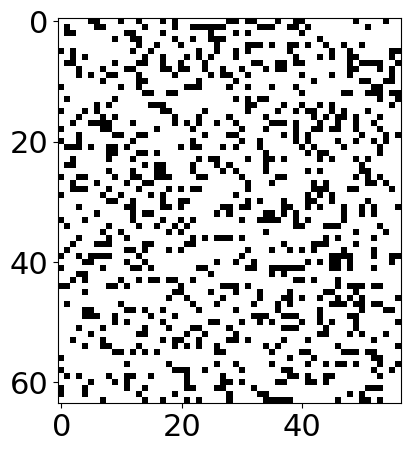

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

pods.access.download_url("https://github.com/lawrennd/slides/raw/gh-pages/diagrams/ml/br1561_6.3.pgm",
                         store_directory="./ml")
six_image = mlai.load_pgm("br1561_6.3.pgm", directory ="./ml")
rows = six_image.shape[0]
col = six_image.shape[1]

ax.imshow(six_image,interpolation='none').set_cmap('gray')
mlai.write_figure("dem_six000.png", directory="./dimred/")
for i in range(3):
    rand_image = np.random.rand(rows, col)<((six_image>0).sum()/float(rows*col))
    ax.imshow(rand_image,interpolation='none').set_cmap('gray')
    mlai.write_figure('dem_six{i:0>3}.png'.format(i=i+1), directory="./dimred/")

In [ ]:
from ipywidgets import IntSlider
import notutils as nu

In [ ]:
nu.display_plots('dem_six{counter:0>3}.png', directory='./dimred', counter=IntSlider(0, 0, 3, 1))

interactive(children=(IntSlider(value=0, description='counter', max=3), Output()), _dom_classes=('widget-inter…

<table>
<tr>
<td width="30%">

<img class="" src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/dem_six000.png" style="width:100%">

</td>
<td width="30%">

<img class="" src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/dem_six001.png" style="width:100%">

</td>
<td width="30%">

<img class="" src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/dem_six002.png" style="width:100%">

</td>
</tr>
</table>

Figure: <i>Even if we sample every nano second from now until the end of
the universe we won’t see the original six again.</i>

Even if we sample every nanosecond from now until the end of the
universe you won’t see the original six again.

## Simple Model of Digit

So, an independent pixel model for this digit doesn’t seem sensible. The
total space is enormous, and yet the space occupied by the type of data
we’re interested in is relatively small.

Consider a different type of model. One where we take a prototype six
and we rotate it left and right to create new data.

In [ ]:
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from skimage.transform import rotate
import numpy as np

In [ ]:
six_image = mlai.load_pgm('br1561_6.3.pgm', directory ='./ml')
six_image = np.hstack([np.zeros((rows, 3)), six_image, np.zeros((rows, 4))])
dim_one = np.asarray(six_image.shape)
angles = range(360)
i = 0
Y = np.zeros((len(angles), np.prod(dim_one)))
for angle in angles:
    rot_image = rotate(six_image, angle, cval=255)
    dim_two = np.asarray(rot_image.shape)
    start = [int(round((dim_two[0] - dim_one[0])/2)), int(round((dim_two[1] - dim_one[1])/2))]
    crop_image = rot_image[start[0]+np.array(range(dim_one[0])), :][:, start[1]+np.array(range(dim_one[1]))]
    Y[i, :] = crop_image.flatten()

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_figsize)
for angle in range(6):
    ax.imshow(np.reshape(Y[i, :], dim_one),interpolation='none').set_cmap('gray')
    mlai.write_figure(f"dem_six_rotate{angle:0>3}.png", directory="./dimred/")

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('dem_six_rotate{counter:0>3}.png', directory='./dimred', counter=(0, 6))

<table>
<tr>
<td width="30%">

<img class="" src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/dem_six_rotate001.png" style="width:100%">

</td>
<td width="30%">

<img class="" src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/dem_six_rotate003.png" style="width:100%">

</td>
<td width="30%">

<img class="" src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/dem_six_rotate005.png" style="width:100%">

</td>
</tr>
</table>

Figure: <i>Rotate a prototype six to form a set of plausible sixes.</i>

<table>
<tr>
<td width="30%">

<img class="" src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/dem_manifold_print001.png" style="width:100%">

</td>
<td width="30%">

<img class="" src="https://mlatcl.github.io/mlfc/./slides/diagrams//dimred/dem_manifold_print002.png" style="width:100%">

</td>
</tr>
</table>

Figure: <i>The rotated sixes projected onto the first two principal
components of the ‘rotated data set.’ The data lives on a one
dimensional manifold in the 3,648 dimensional space.</i>

## Low Dimensional Manifolds

Of course, in practice pure rotation of the image is too simple a model.
Digits can undergo several distortions and retain their nature. For
example, they can be scaled, they can go through translation, they can
udnergo ‘thinning.’ But, for data with ‘structure’ we expect fewer of
these distortions than the dimension of the data. This means we expect
data to live on a lower dimensonal manifold. This implies that we should
deal with high dimensional data by looking for a lower dimensional
(non-linear) embedding.

## Summary and Key Points

We’ve covered several key ideas about dimensionality reduction:

1.  High-dimensional spaces have counter-intuitive properties:
    -   The curse of dimensionality
    -   Concentration of distances
2.  Real data doesn’t behave like random high-dimensional data because:
    -   It lies near lower-dimensional manifolds
    -   It has structure imposed by physics, biology, or other
        constraints
3.  This structure makes dimensionality reduction possible:
    -   PCA finds linear manifolds
    -   More sophisticated methods can find nonlinear manifolds
4.  The probabilistic perspective helps us:
    -   Understand when methods will work
    -   Quantify uncertainty in our reduced representations
    -   Connect dimensionality reduction to other machine learning
        approaches

## Thanks!

For more information on these subjects and more you might want to check
the following resources.

-   company: [Trent AI](https://trent.ai)
-   book: [The Atomic
    Human](https://www.penguin.co.uk/books/455130/the-atomic-human-by-lawrence-neil-d/9780241625248)
-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

::: {.cell .markdown}

## References

Bishop, C.M., 1995. Neural networks for pattern recognition. Oxford
University Press.

Bishop, C.M., James, G.D., 1993. Analysis of multiphase flows using
dual-energy gamma densitometry and neural networks. Nuclear Instruments
and Methods in Physics Research A327, 580–593.
<https://doi.org/10.1016/0168-9002(93)90728-Z>

Della Gatta, G., Bansal, M., Ambesi-Impiombato, A., Antonini, D.,
Missero, C., Bernardo, D. di, 2008. Direct targets of the TRP63
transcription factor revealed by a combination of gene expression
profiling and reverse engineering. Genome Research 18, 939–948.
<https://doi.org/10.1101/gr.073601.107>

Ferris, B.D., Fox, D., Lawrence, N.D., 2007. WiFi-SLAM using Gaussian
process latent variable models, in: Veloso, M.M. (Ed.), Proceedings of
the 20th International Joint Conference on Artificial Intelligence
(IJCAI 2007). pp. 2480–2485.

Lake, B.M., Lawrence, N.D., Tenenbaum, J.B., 2018. The emergence of
organizing structure in conceptual representation. Cognitive science 42
Suppl 3, 809–832. <https://doi.org/10.1111/cogs.12580>

Le Cun, Y., Boser, B.E., Denker, J.S., Henderson, D., Howard, R.E.,
Hubbard, W., Jackel, L.D., 1989. Backpropagation applied to handwritten
zip code recognition. Neural Computation 1, 541–551.
<https://doi.org/10.1162/neco.1989.1.4.541>

McLachlan, G.J., Basford, K.E., 1988. Mixture models: Inference and
applications to clustering. Marcel Dekker, New York.